***
## Table of Contents
<br>
<ol>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;"> 70:30 Uninfected:Infected Users</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. 70:30 Train Test Split </h3></a>
            </ul>
     </ol>
<br>

In [39]:
### Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
pd.set_option("display.max_columns",40)
warnings.filterwarnings("ignore")

from IPython.display import HTML


import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,binarize
from pandas_ml import ConfusionMatrix

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:


### Function get_params takes as input a grid search model and prints out the best parameters for the model and 
### prints the best accuracy of the model
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())

### The function takes as input the model, X and Y data to generate the confusion matrix  
def get_cm(model,a,b):
    y_pred=model.predict(a)
    cm=ConfusionMatrix(b,y_pred)
    display(cm)
    return cm
 
### The get accuracy plot takes as input a dataframe and a string for the title of the plot and displays a plot
### The function is primarily for plotting of accuracies for various classifiers for the same split.
def get_accuracy_plot(data,title=''):
    plt.figure(figsize=(12,8))
    plt.plot(data['accuracy'].values, '--o')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Classifier', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    plt.xlim([0, 9])
    plt.title(title,size=18,y=1.05)
    plt.xticks(np.arange(10),data.index.get_values(),rotation=90)
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

### Function grid takes as input an estimator, X_train,Y_Train,X_test and Y_test and a string represetning the name of the model
### We perform StratifiedKFold cross validation and grid search to hypertune the parameters of the model     
def grid_acc(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=params,scoring='accuracy',cv=kfold,n_jobs=24)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    acc_train=accuracy_score(y,grid_search.predict(x))
    print("Accuracy of the ",model_name," model for the training data is:",acc_train)
    print("\nConfusion Matrix for Training data is:")
    cm_train=get_cm(grid_search,x,y)
    acc_test=accuracy_score(y_test,grid_search.predict(x_test))
    print("Accuracy of the ",model_name," model for test data is:",acc_test)
    print("\nConfusion Matrix for test data is:")
    cm_test=get_cm(grid_search,x_test,y_test)
    return grid_search,cm_train,cm_test,acc_train,acc_test    

### Plot roc curve
def get_roc_curve(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy on test data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

def get_roc_curve_deep_learning(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy of Logistic Model on training data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

#### Function models

In [3]:
def feat_impt_plot(feat_impt):    
    data = [go.Bar(x=columns,y=feat_impt,text=np.round(feat_impt,2),
            textposition = 'outside',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6
        )]
    layout = go.Layout(
    xaxis=dict(title='Features',
        tickfont=dict(
            size=12,
            color='black'
        )),
    yaxis=dict(title='Feature Importances'))
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [4]:
def KNN_model(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'K-Nearest Neighbors' + '\033[0m')
    knn=KNeighborsClassifier()
    parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
    knn_model,cm_train,cm_test,acc_train,acc_test=grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")
    cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)
    knn=KNeighborsClassifier(**knn_model.best_params_)
    knn.fit(X_train,Y_train)
    return knn,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [5]:
def Logistic_model(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'Logistic Regression' + '\033[0m')
    logistic=LogisticRegression()
    parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial'])
    log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")
    cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)
    logistic=LogisticRegression(**log_model.best_params_)
    return logistic,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [6]:
def RandomForest(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'RandomForest Classifier' + '\033[0m')
    rf=RandomForestClassifier()
    parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
    rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")
    cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)
    rf=RandomForestClassifier(**rf_model.best_params_)
    rf.fit(X_train,Y_train)
    feat_impt_plot(rf.feature_importances_)
    return rf,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,rf.feature_importances_

In [7]:
def AdaBoost(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'Adaoost Classifier' + '\033[0m')
    ada=AdaBoostClassifier()
    parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
    ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")
    cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)
    ada=AdaBoostClassifier(**ada_model.best_params_)
    ada.fit(X_train,Y_train)
    feat_impt_plot(ada.feature_importances_)
    return ada,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,ada.feature_importances_

In [8]:
def GradientBoosting(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'GradientBoosting Classifier' + '\033[0m')
    gbc=GradientBoostingClassifier()
    parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
    gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")
    cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)
    gbc_model=GradientBoostingClassifier(**gbc_model.best_params_)
    gbc_model.fit(X_train,Y_train)
    feat_impt_plot(gbc_model.feature_importances_)
    return gbc_model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,gbc_model.feature_importances_

In [9]:
def ExtraTree(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'ExtraTree Classifier' + '\033[0m')
    ext_tree=ExtraTreeClassifier()
    parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
    ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")
    cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)
    ext_tree_model=ExtraTreeClassifier(**ext_tree_model.best_params_)
    ext_tree_model.fit(X_train,Y_train)
    feat_impt_plot(ext_tree_model.feature_importances_)
    return ext_tree_model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,ext_tree_model.feature_importances_

In [10]:
def Bagging(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'Bagging Classifier' + '\033[0m')
    bagging=BaggingClassifier()
    parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )
    bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")
    cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)
    bagging=BaggingClassifier(**bagging_model.best_params_)
    bagging.fit(X_train,Y_train)
    return bagging,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [11]:
# def Voting(models,X_train,Y_train,X_test,Y_test):
#     print('\033[1m' + 'Voting Classifier' + '\033[0m')
#     eclf = VotingClassifier(estimators=[models], voting='soft')
#     eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
#     acc_train=eclf.score(X_train,Y_train)
#     print("The training accuracy is :",acc_train)
#     pred=eclf.predict(X_test)
#     cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
#     acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
#     print("The test accuracy is:",acc_test)
#     cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
#     display(cm_test)
#     cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)
#     return cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [12]:
def DeepLearning1(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'Neural Network-1' + '\033[0m')
    np.random.seed(0)
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)
    acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
    print("The accuracy of the model on training data is:",acc_train)
    cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
    cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
    display(cm_train)
    acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
    print("The accuracy of the model on test data is:",acc_test)
    display(cm_test)
    cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)
    return  deep_learning,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [13]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=35))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning

In [14]:
def DeepLearning2(X_train,Y_train,X_test,Y_test):
    print('\033[1m' + 'Neural Network-2' + '\033[0m')
    classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
    grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
    grid_search.fit(X_train,Y_train)
    acc_train=grid_search.score(X_train,Y_train)
    print("The accuracy of the model on training data is:",acc_train)
    cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
    display(cm_train)
    acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
    print("The accuracy of the model on test data is:",acc_test)
    cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
    display(cm_test)
    cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)
    return grid_search,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc

In [15]:
columns=['SP','DP','NAPP','SIP','DIP','NREC','PAR','PAS','LEN','BYS', 'BYR', '00:00', '01:00', '02:00', '03:00', '04:00', '05:00',
       '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00',
       '22:00', '23:00']

ind_columns=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier',
                            'Neural Network-1','Neural-Network-2']

f=[KNN_model,Logistic_model,RandomForest,AdaBoost,GradientBoosting, ExtraTree,Bagging,DeepLearning1,DeepLearning2]

###  <a id='1.A' style="text-decoration : none; color : #000000;">A. 80:20 Train Test Split</a>

#### Random State 0

In [16]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_0.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dcafa2634bb293a127a,4568,42,49,57,1200,5038,146.820762,56.766574,78.731441,5765.397777,184063.583962,578,185,138,268,205,180,149,136,156,104,120,158,254,116,207,118,134,215,177,142,343,221,295,439
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d8142614e2006d9d3c,16,4,6,5,7,16,5.937500,9.375000,34.125000,1506.000000,3370.125000,0,0,0,0,0,0,0,0,0,0,2,3,2,0,0,0,7,0,2,0,0,0,0,0


1 -> Infected
0 -> Uninfected


User
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dcafa2634bb293a127a    1
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d8142614e2006d9d3c    0
d348da18a4a8399e475122a0c73774f25fc9e7a1e047cf13843f8937afc814cc    0
ebf7553759a0cdbba0add7b038d6fab41a22dead2830bb0c35b18bfab37a2218    0
edec2b03986c67647a3e7b653f30189e134e546ae0da8b2a8e77660c60bbef5a    0
Name: Target, dtype: int64

The train/test split ratio is 80:20


In [17]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,manhattan,20,distance


Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5451     0     5451
True           0  2309     2309
__all__     5451  2309     7760

Accuracy of the  KNN  model for test data is: 0.7932989690721649

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1182   157     1339
True         244   357      601
__all__     1426   514     1940

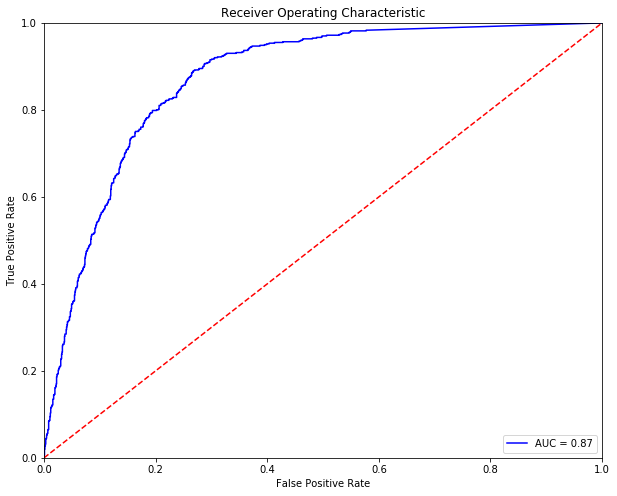

Optimal Threshold is 0.3034526945735687
Accuracy on test data is: 0.7989690721649485


Predicted  False  True  __all__
Actual                         
False       1070   269     1339
True         121   480      601
__all__     1191   749     1940



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.5,False,False,0.7,100,multinomial,l2,sag,0.1


Accuracy of the  Logistic  model for the training data is: 0.8052835051546392

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4482   969     5451
True         542  1767     2309
__all__     5024  2736     7760

Accuracy of the  Logistic  model for test data is: 0.822680412371134

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1126   213     1339
True         131   470      601
__all__     1257   683     1940

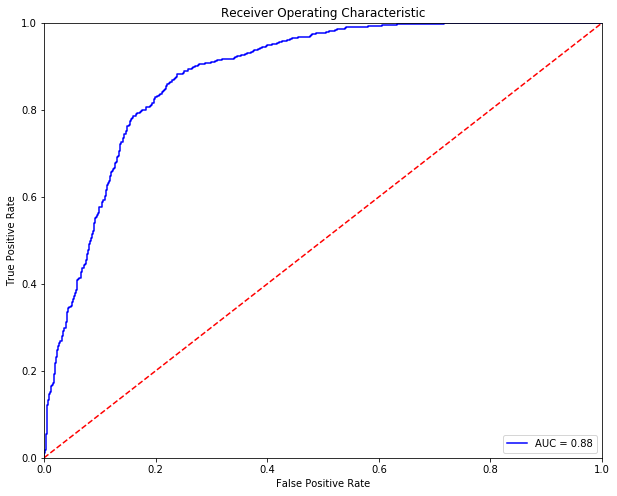

Optimal Threshold is 0.4604620838210319
Accuracy on test data is: 0.8087628865979382


Predicted  False  True  __all__
Actual                         
False       1083   256     1339
True         115   486      601
__all__     1198   742     1940



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,200,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.8059278350515464

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4522   929     5451
True         577  1732     2309
__all__     5099  2661     7760

Accuracy of the  Random Forest Trees  model for test data is: 0.8195876288659794

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1129   210     1339
True         140   461      601
__all__     1269   671     1940

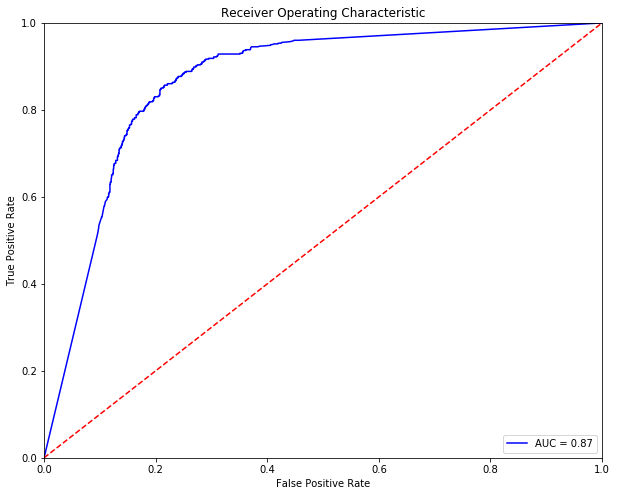

Optimal Threshold is 0.3375224419489646
Accuracy on test data is: 0.8134020618556701


Predicted  False  True  __all__
Actual                         
False       1090   249     1339
True         113   488      601
__all__     1203   737     1940



Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME.R,0.5,150,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8154639175257732

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4735   716     5451
True         716  1593     2309
__all__     5451  2309     7760

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8041237113402062

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1153   186     1339
True         194   407      601
__all__     1347   593     1940

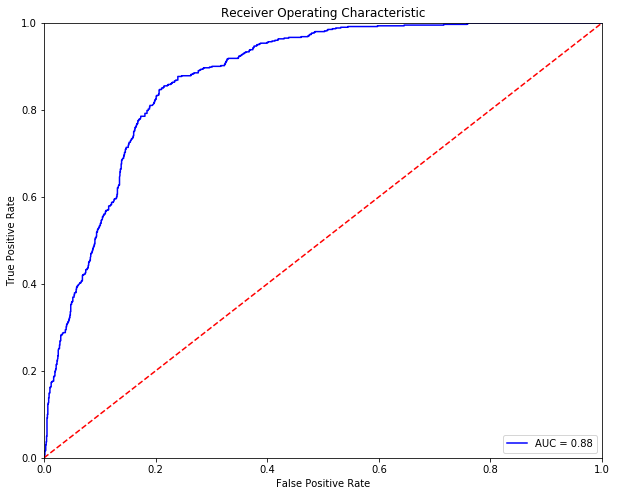

Optimal Threshold is 0.4985076233173853
Accuracy on test data is: 0.8097938144329897


Predicted  False  True  __all__
Actual                         
False       1085   254     1339
True         115   486      601
__all__     1200   740     1940



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.1,exponential,5,0.1,50,0,0.7


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8184278350515464

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4732   719     5451
True         690  1619     2309
__all__     5422  2338     7760

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8170103092783505

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1160   179     1339
True         176   425      601
__all__     1336   604     1940

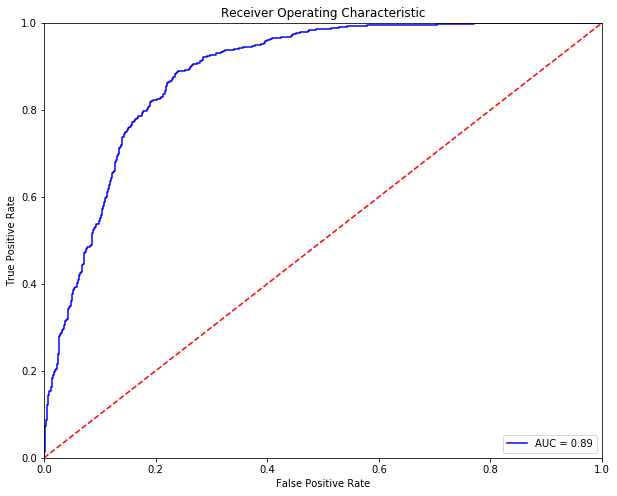

Optimal Threshold is 0.36207639748954124
Accuracy on test data is: 0.8108247422680412


Predicted  False  True  __all__
Actual                         
False       1086   253     1339
True         114   487      601
__all__     1200   740     1940



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,10,auto,0.001,5,2,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.8070876288659794

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4755   696     5451
True         801  1508     2309
__all__     5556  2204     7760

Accuracy of the  Extra Decision Tree  model for test data is: 0.8134020618556701

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1170   169     1339
True         193   408      601
__all__     1363   577     1940

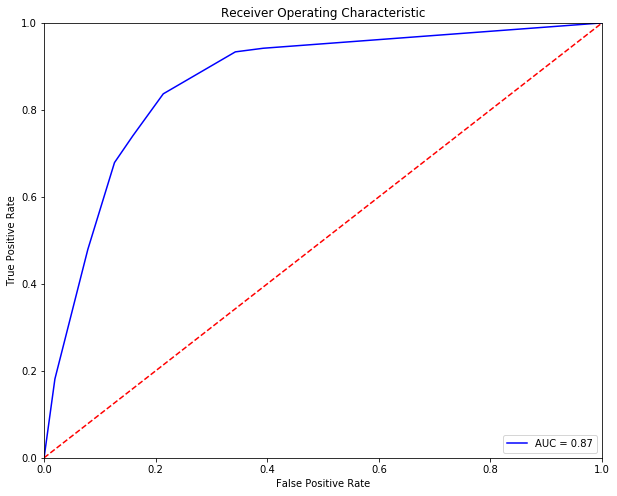

Optimal Threshold is 0.3539325842696629
Accuracy on test data is: 0.8097938144329897


Predicted  False  True  __all__
Actual                         
False       1126   213     1339
True         156   445      601
__all__     1282   658     1940



Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.2,0.3,300,True,0


Accuracy of the  Bagging  model for the training data is: 0.9247422680412372

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5246   205     5451
True         379  1930     2309
__all__     5625  2135     7760

Accuracy of the  Bagging  model for test data is: 0.8144329896907216

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1159   180     1339
True         180   421      601
__all__     1339   601     1940

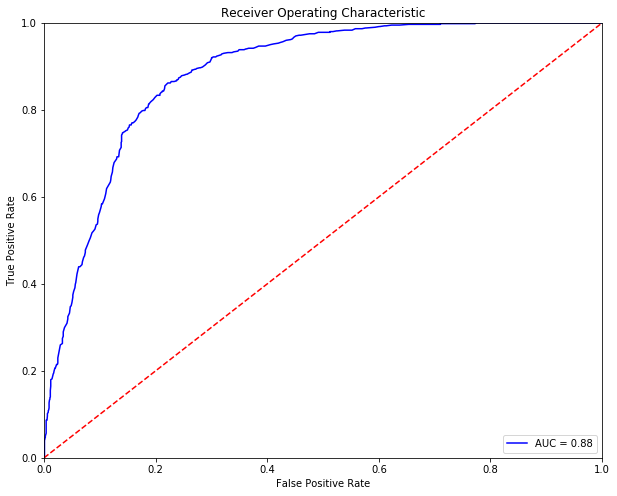

Optimal Threshold is 0.37666666666666665
Accuracy on test data is: 0.811340206185567


Predicted  False  True  __all__
Actual                         
False       1090   249     1339
True         117   484      601
__all__     1207   733     1940



Neural Network-1
The accuracy of the model on training data is: 0.9189432989690721


Predicted  False  True  __all__
Actual                         
False       5308   143     5451
True         486  1823     2309
__all__     5794  1966     7760

The accuracy of the model on test data is: 0.7695876288659794


Predicted  False  True  __all__
Actual                         
False       1165   174     1339
True         273   328      601
__all__     1438   502     1940

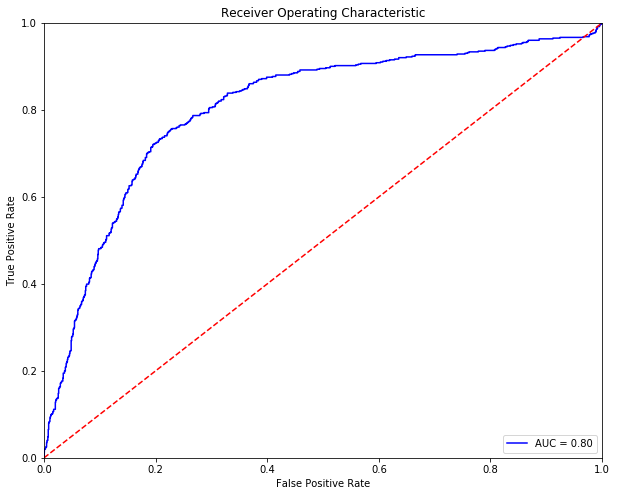

Optimal Threshold is 0.11778466
Accuracy of Logistic Model on training data is: 0.7608247422680412


Predicted  False  True  __all__
Actual                         
False       1020   319     1339
True         145   456      601
__all__     1165   775     1940



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.3min finished


The accuracy of the model on training data is: 0.8094072164948454


Predicted  False  True  __all__
Actual                         
False       4555   896     5451
True         583  1726     2309
__all__     5138  2622     7760

The accuracy of the model on test data is: 0.8201030927835051


Predicted  False  True  __all__
Actual                         
False       1134   205     1339
True         144   457      601
__all__     1278   662     1940

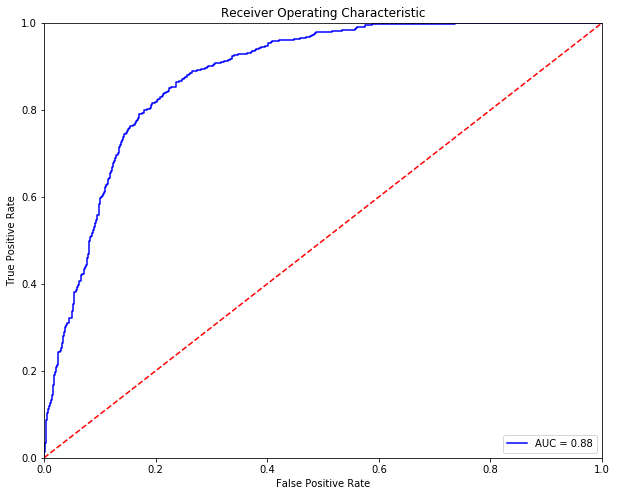

Optimal Threshold is 0.42840737
Accuracy on test data is: 0.8082474226804124


Predicted  False  True  __all__
Actual                         
False       1083   256     1339
True         116   485      601
__all__     1199   741     1940

In [18]:
feat_imp=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_80_50_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_80_50_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_80_50_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [19]:
table_80_50_train['index']=ind_columns
table_80_50_test['index']=ind_columns
table_80_50_test_roc['index']=ind_columns

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)
table_80_50_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,1.000000,2309.0,5451.0,0.0,0.0,0.000000,0.000000
LogisticRegression,0.805284,1767.0,4482.0,969.0,542.0,0.177766,0.234734
RandomForestClassifier,0.805928,1732.0,4522.0,929.0,577.0,0.170427,0.249892
AdaBoostClassifier,0.815464,1593.0,4735.0,716.0,716.0,0.131352,0.310091
GradientBoostingClassifier,0.818428,1619.0,4732.0,719.0,690.0,0.131902,0.298831
ExtraTreeClassifier,0.807088,1508.0,4755.0,696.0,801.0,0.127683,0.346903
BaggingClassifier,0.924742,1930.0,5246.0,205.0,379.0,0.037608,0.164140
Neural Network-1,0.918943,1823.0,5308.0,143.0,486.0,0.026234,0.210481
Neural-Network-2,0.809407,1726.0,4555.0,896.0,583.0,0.164374,0.252490


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.793299,357.0,1182.0,157.0,244.0,0.117252,0.405990
LogisticRegression,0.822680,470.0,1126.0,213.0,131.0,0.159074,0.217970
RandomForestClassifier,0.819588,461.0,1129.0,210.0,140.0,0.156833,0.232945
AdaBoostClassifier,0.804124,407.0,1153.0,186.0,194.0,0.138910,0.322795
GradientBoostingClassifier,0.817010,425.0,1160.0,179.0,176.0,0.133682,0.292845
ExtraTreeClassifier,0.813402,408.0,1170.0,169.0,193.0,0.126214,0.321131
BaggingClassifier,0.814433,421.0,1159.0,180.0,180.0,0.134429,0.299501
Neural Network-1,0.769588,328.0,1165.0,174.0,273.0,0.129948,0.454243
Neural-Network-2,0.820103,457.0,1134.0,205.0,144.0,0.153099,0.239601


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.798969,480.0,1070.0,269.0,121.0,0.200896,0.201331,0.303453,0.871990
LogisticRegression,0.808763,486.0,1083.0,256.0,115.0,0.191187,0.191348,0.460462,0.882916
RandomForestClassifier,0.813402,488.0,1090.0,249.0,113.0,0.185960,0.188020,0.337522,0.867514
AdaBoostClassifier,0.809794,486.0,1085.0,254.0,115.0,0.189694,0.191348,0.498508,0.877126
GradientBoostingClassifier,0.810825,487.0,1086.0,253.0,114.0,0.188947,0.189684,0.362076,0.885748
ExtraTreeClassifier,0.809794,445.0,1126.0,213.0,156.0,0.159074,0.259567,0.353933,0.866013
BaggingClassifier,0.811340,484.0,1090.0,249.0,117.0,0.185960,0.194676,0.376667,0.883570
Neural Network-1,0.760825,456.0,1020.0,319.0,145.0,0.238237,0.241265,0.117785,0.804262
Neural-Network-2,0.808247,485.0,1083.0,256.0,116.0,0.191187,0.193012,0.428407,0.880677


#### Random State 10

In [20]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_10.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c420a510d83a4c8d5e70f0fa79b896008585c400807126e0dd367ef0eecebeb6,80,8,12,4,37,83,302.084337,170.180723,63.951807,15306.156627,407432.662651,4,0,1,7,1,2,1,0,0,7,12,5,6,0,6,0,1,3,6,5,3,2,11,0
059e225e600d51b34c32768dc16436d7ad6965e7428e90584c9fb25b9825bc68,548,8,19,8,205,554,510.418773,159.868231,45.395307,13566.797834,655119.371841,0,0,0,0,0,0,0,0,0,0,0,105,10,253,116,23,3,9,32,3,0,0,0,0


1 -> Infected
0 -> Uninfected


User
c420a510d83a4c8d5e70f0fa79b896008585c400807126e0dd367ef0eecebeb6    0
059e225e600d51b34c32768dc16436d7ad6965e7428e90584c9fb25b9825bc68    0
b384a39ab44eec7cfd2e093a0daa02cb8a31a5de2074be25a8cb7080b7bc2b4b    1
60a7e83d06013e0ecddb5488d101b31bdc44a0738f64667b46945011e3061980    0
d4ef6b0efdda4db1f34072faa7922be1c6d401feff238cbd5537ac6d707ac431    0
Name: Target, dtype: int64

The train/test split ratio is 80:20


In [21]:
## Table to store training and test measures
table_80_50_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,euclidean,50,distance


Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5429     0     5429
True           0  2331     2331
__all__     5429  2331     7760

Accuracy of the  KNN  model for test data is: 0.8051546391752578

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1175   186     1361
True         192   387      579
__all__     1367   573     1940

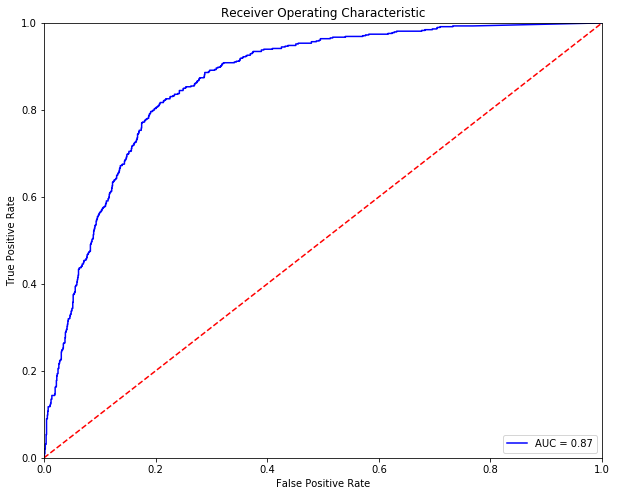

Optimal Threshold is 0.33703282584831007
Accuracy on test data is: 0.8020618556701031


Predicted  False  True  __all__
Actual                         
False       1092   269     1361
True         115   464      579
__all__     1207   733     1940



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.3,False,False,0.5,100,ovr,l2,sag,0.1


Accuracy of the  Logistic  model for the training data is: 0.8096649484536083

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4473   956     5429
True         521  1810     2331
__all__     4994  2766     7760

Accuracy of the  Logistic  model for test data is: 0.8067010309278351

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1127   234     1361
True         141   438      579
__all__     1268   672     1940

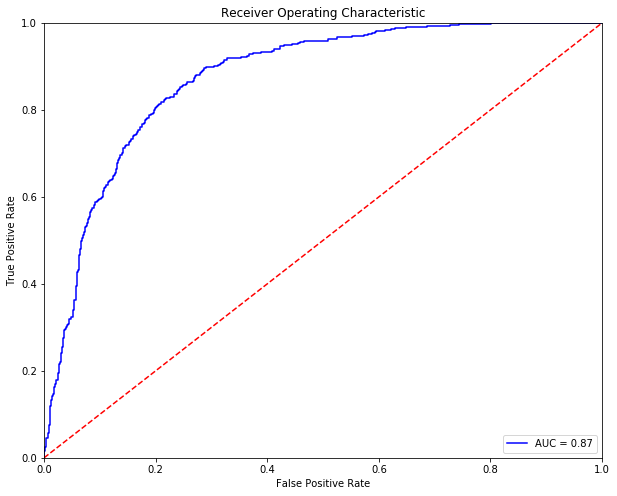

Optimal Threshold is 0.4265892884991891
Accuracy on test data is: 0.8010309278350516


Predicted  False  True  __all__
Actual                         
False       1091   270     1361
True         116   463      579
__all__     1207   733     1940



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,200,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.8117268041237113

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4530   899     5429
True         562  1769     2331
__all__     5092  2668     7760

Accuracy of the  Random Forest Trees  model for test data is: 0.8123711340206186

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1145   216     1361
True         148   431      579
__all__     1293   647     1940

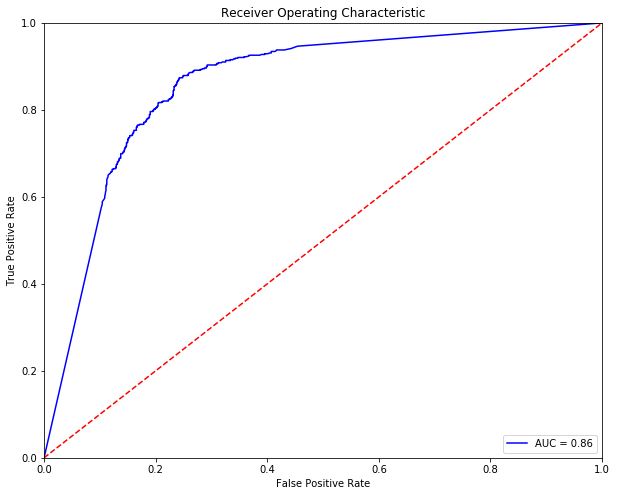

Optimal Threshold is 0.28236453857262184
Accuracy on test data is: 0.8015463917525774


Predicted  False  True  __all__
Actual                         
False       1091   270     1361
True         115   464      579
__all__     1206   734     1940



Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,1.5,50,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8135309278350515

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4537   892     5429
True         555  1776     2331
__all__     5092  2668     7760

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8139175257731959

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1149   212     1361
True         149   430      579
__all__     1298   642     1940

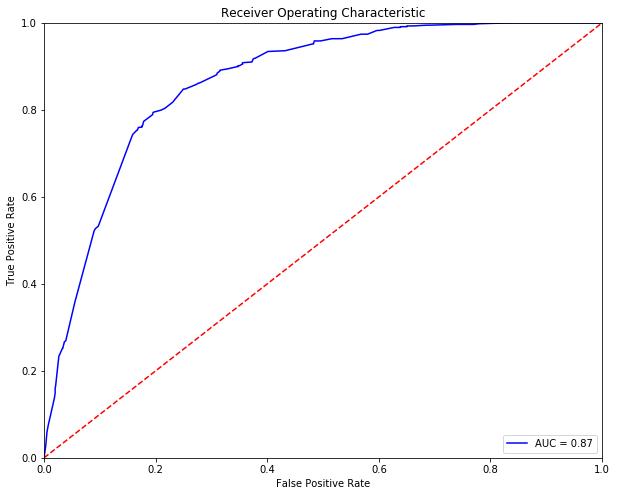

Optimal Threshold is 0.4742855646138773
Accuracy on test data is: 0.8015463917525774


Predicted  False  True  __all__
Actual                         
False       1095   266     1361
True         119   460      579
__all__     1214   726     1940



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.03,deviance,20,0.2,150,0,0.7


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8229381443298969

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4706   723     5429
True         651  1680     2331
__all__     5357  2403     7760

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8149484536082474

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1177   184     1361
True         175   404      579
__all__     1352   588     1940

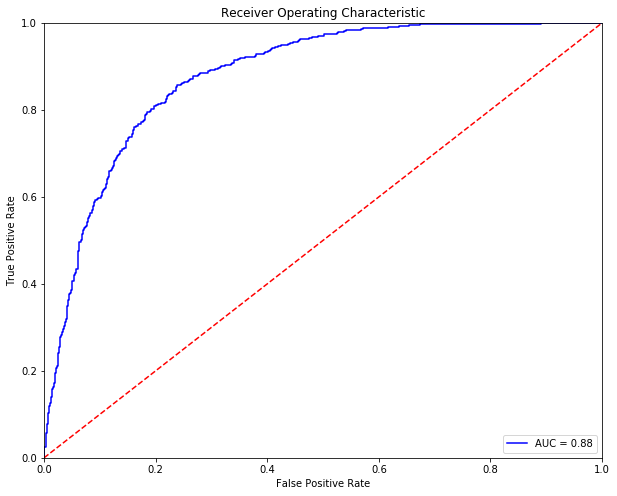

Optimal Threshold is 0.3416070974397493
Accuracy on test data is: 0.8041237113402062


Predicted  False  True  __all__
Actual                         
False       1095   266     1361
True         114   465      579
__all__     1209   731     1940



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,10,auto,0.001,2,2,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.8117268041237113

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4536   893     5429
True         568  1763     2331
__all__     5104  2656     7760

Accuracy of the  Extra Decision Tree  model for test data is: 0.8103092783505155

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1142   219     1361
True         149   430      579
__all__     1291   649     1940

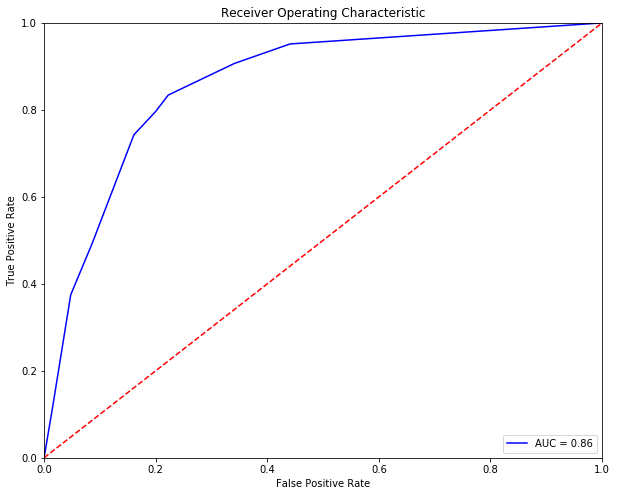

Optimal Threshold is 0.36231884057971014
Accuracy on test data is: 0.8103092783505155


Predicted  False  True  __all__
Actual                         
False       1142   219     1361
True         149   430      579
__all__     1291   649     1940



Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.6,0.4,300,True,0


Accuracy of the  Bagging  model for the training data is: 0.9480670103092783

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5297   132     5429
True         271  2060     2331
__all__     5568  2192     7760

Accuracy of the  Bagging  model for test data is: 0.8128865979381443

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1172   189     1361
True         174   405      579
__all__     1346   594     1940

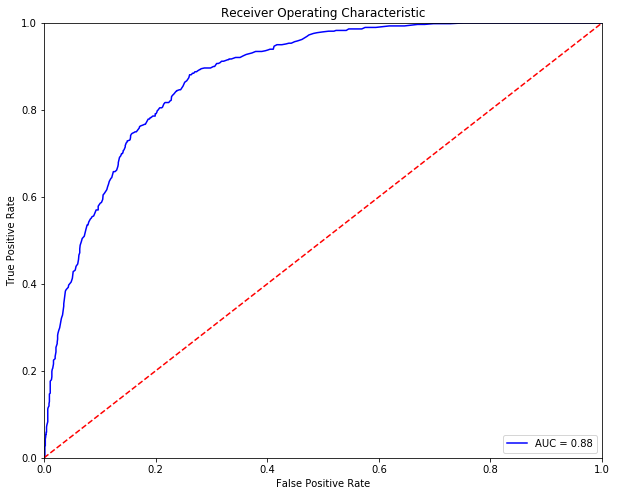

Optimal Threshold is 0.36333333333333334
Accuracy on test data is: 0.7969072164948454


Predicted  False  True  __all__
Actual                         
False       1086   275     1361
True         119   460      579
__all__     1205   735     1940



Neural Network-1
The accuracy of the model on training data is: 0.9195876288659793


Predicted  False  True  __all__
Actual                         
False       5143   286     5429
True         338  1993     2331
__all__     5481  2279     7760

The accuracy of the model on test data is: 0.7932989690721649


Predicted  False  True  __all__
Actual                         
False       1168   193     1361
True         208   371      579
__all__     1376   564     1940

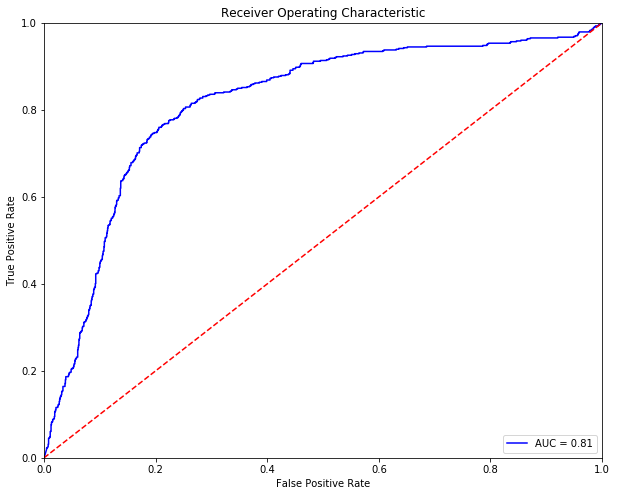

Optimal Threshold is 0.20742254
Accuracy of Logistic Model on training data is: 0.7752577319587629


Predicted  False  True  __all__
Actual                         
False       1055   306     1361
True         130   449      579
__all__     1185   755     1940



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.0min finished


The accuracy of the model on training data is: 0.8179123711340206


Predicted  False  True  __all__
Actual                         
False       4615   814     5429
True         599  1732     2331
__all__     5214  2546     7760

The accuracy of the model on test data is: 0.8134020618556701


Predicted  False  True  __all__
Actual                         
False       1160   201     1361
True         161   418      579
__all__     1321   619     1940

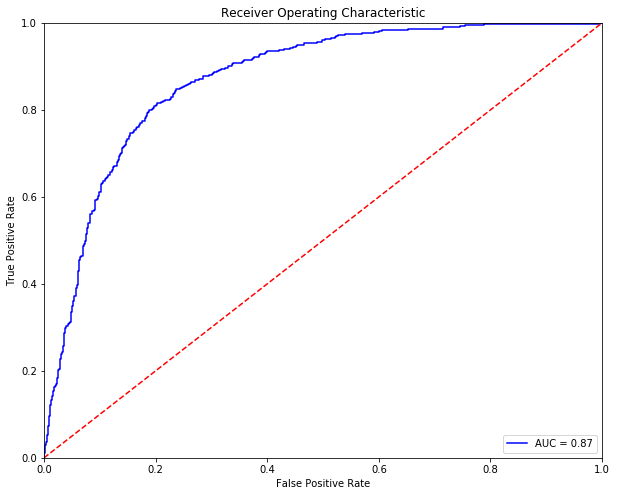

Optimal Threshold is 0.33848432
Accuracy on test data is: 0.8041237113402062


Predicted  False  True  __all__
Actual                         
False       1095   266     1361
True         114   465      579
__all__     1209   731     1940

In [22]:
feat_imp_10=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp_10[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_80_50_10_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_80_50_10_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_80_50_10_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [23]:
table_80_50_10_train['index']=ind_columns
table_80_50_10_test['index']=ind_columns
table_80_50_10_test_roc['index']=ind_columns
table_80_50_10_test.set_index(['index'],drop=True,inplace=True)
table_80_50_10_train.set_index(['index'],drop=True,inplace=True)
table_80_50_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_10_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_10_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,1.000000,2331.0,5429.0,0.0,0.0,0.000000,0.000000
LogisticRegression,0.809665,1810.0,4473.0,956.0,521.0,0.176091,0.223509
RandomForestClassifier,0.811727,1769.0,4530.0,899.0,562.0,0.165592,0.241098
AdaBoostClassifier,0.813531,1776.0,4537.0,892.0,555.0,0.164303,0.238095
GradientBoostingClassifier,0.822938,1680.0,4706.0,723.0,651.0,0.133174,0.279279
ExtraTreeClassifier,0.811727,1763.0,4536.0,893.0,568.0,0.164487,0.243672
BaggingClassifier,0.948067,2060.0,5297.0,132.0,271.0,0.024314,0.116259
Neural Network-1,0.919588,1993.0,5143.0,286.0,338.0,0.052680,0.145002
Neural-Network-2,0.817912,1732.0,4615.0,814.0,599.0,0.149936,0.256971


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.805155,387.0,1175.0,186.0,192.0,0.136664,0.331606
LogisticRegression,0.806701,438.0,1127.0,234.0,141.0,0.171932,0.243523
RandomForestClassifier,0.812371,431.0,1145.0,216.0,148.0,0.158707,0.255613
AdaBoostClassifier,0.813918,430.0,1149.0,212.0,149.0,0.155768,0.257340
GradientBoostingClassifier,0.814948,404.0,1177.0,184.0,175.0,0.135195,0.302245
ExtraTreeClassifier,0.810309,430.0,1142.0,219.0,149.0,0.160911,0.257340
BaggingClassifier,0.812887,405.0,1172.0,189.0,174.0,0.138868,0.300518
Neural Network-1,0.793299,371.0,1168.0,193.0,208.0,0.141807,0.359240
Neural-Network-2,0.813402,418.0,1160.0,201.0,161.0,0.147686,0.278066


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.802062,464.0,1092.0,269.0,115.0,0.197649,0.198618,0.337033,0.867220
LogisticRegression,0.801031,463.0,1091.0,270.0,116.0,0.198384,0.200345,0.426589,0.873564
RandomForestClassifier,0.801546,464.0,1091.0,270.0,115.0,0.198384,0.198618,0.282365,0.859637
AdaBoostClassifier,0.801546,460.0,1095.0,266.0,119.0,0.195445,0.205527,0.474286,0.865702
GradientBoostingClassifier,0.804124,465.0,1095.0,266.0,114.0,0.195445,0.196891,0.341607,0.878924
ExtraTreeClassifier,0.810309,430.0,1142.0,219.0,149.0,0.160911,0.257340,0.362319,0.861682
BaggingClassifier,0.796907,460.0,1086.0,275.0,119.0,0.202057,0.205527,0.363333,0.881024
Neural Network-1,0.775258,449.0,1055.0,306.0,130.0,0.224835,0.224525,0.207423,0.814398
Neural-Network-2,0.804124,465.0,1095.0,266.0,114.0,0.195445,0.196891,0.338484,0.871531


#### Random State 20

In [25]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_20.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

## Table to store training and test measures
table_80_50_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5f5a2b60a4480e331c,85,2,2,1,5,86,2.523256,1.813953,30.546512,157.523256,2244.197674,6,38,1,5,0,8,1,0,6,2,2,0,1,5,6,1,0,1,0,0,0,0,0,3
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e107c9b0e15a44099a,358,6,13,8,133,363,22.209366,12.785124,63.633609,2778.881543,24241.719008,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,161,93,61,44,0,0


1 -> Infected
0 -> Uninfected


User
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5f5a2b60a4480e331c    0
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e107c9b0e15a44099a    0
4ba926e44bbc5718a83b0a3d37d4b38344b8413313a380c59079fb0ac246f6d8    1
f27f0a15e884be036824b69b19111caa9597b97f2bbd91941e15671027811583    0
d80a556c9a21d199c8e0b539e665a577a1c38c2a1d6172c68c634889aa7a1c6e    1
Name: Target, dtype: int64

The train/test split ratio is 80:20


K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,euclidean,50,distance


Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5425     0     5425
True           0  2335     2335
__all__     5425  2335     7760

Accuracy of the  KNN  model for test data is: 0.7984536082474227

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1192   173     1365
True         218   357      575
__all__     1410   530     1940

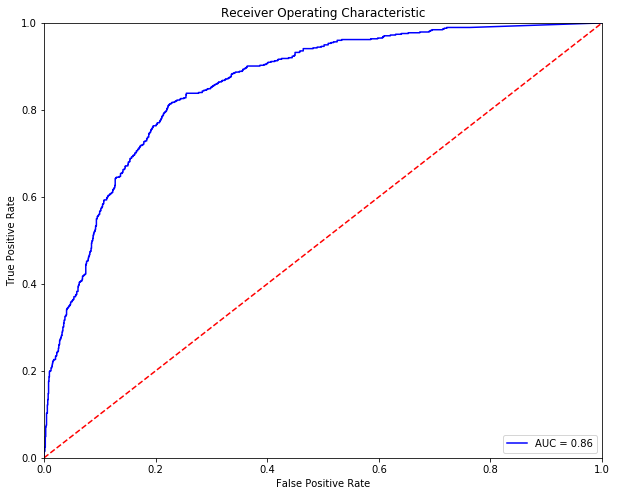

Optimal Threshold is 0.31995813802804446
Accuracy on test data is: 0.7871134020618556


Predicted  False  True  __all__
Actual                         
False       1075   290     1365
True         123   452      575
__all__     1198   742     1940



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.7,False,False,0.7,100,multinomial,l2,sag,0.1


Accuracy of the  Logistic  model for the training data is: 0.8012886597938145

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4417  1008     5425
True         534  1801     2335
__all__     4951  2809     7760

Accuracy of the  Logistic  model for test data is: 0.7948453608247422

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1120   245     1365
True         153   422      575
__all__     1273   667     1940

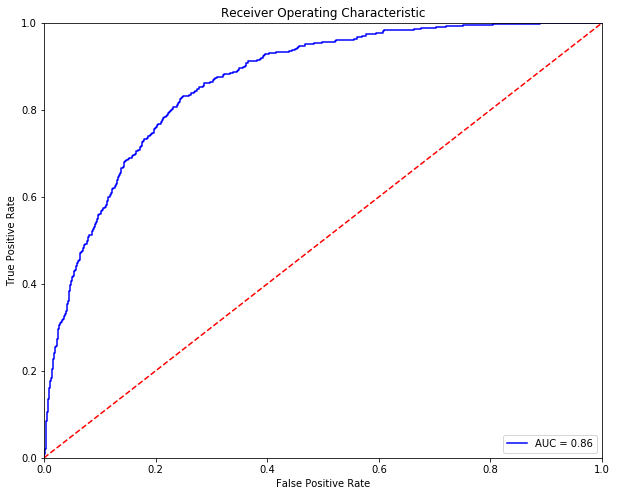

Optimal Threshold is 0.4606006611930876
Accuracy on test data is: 0.7835051546391752


Predicted  False  True  __all__
Actual                         
False       1070   295     1365
True         125   450      575
__all__     1195   745     1940



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,200,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.8043814432989691

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4469   956     5425
True         562  1773     2335
__all__     5031  2729     7760

Accuracy of the  Random Forest Trees  model for test data is: 0.8

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1132   233     1365
True         155   420      575
__all__     1287   653     1940

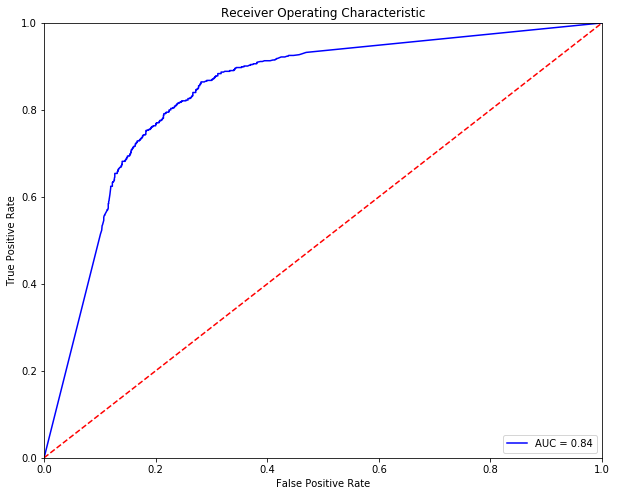

Optimal Threshold is 0.288198830073193
Accuracy on test data is: 0.7860824742268041


Predicted  False  True  __all__
Actual                         
False       1073   292     1365
True         123   452      575
__all__     1196   744     1940



Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,0.5,400,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8081185567010309

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4636   789     5425
True         700  1635     2335
__all__     5336  2424     7760

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1168   197     1365
True         191   384      575
__all__     1359   581     1940

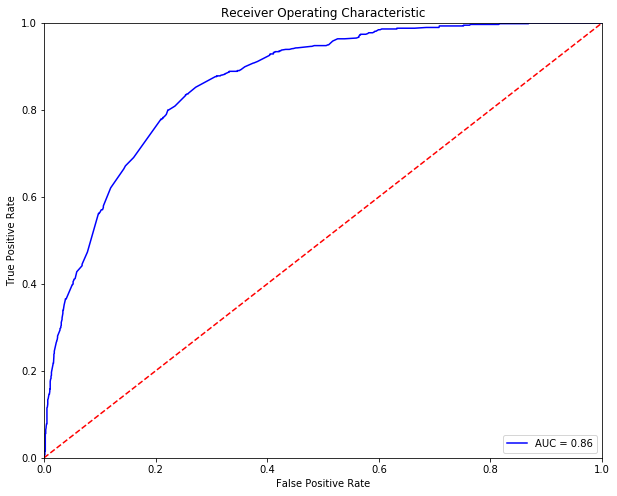

Optimal Threshold is 0.48145596625432624
Accuracy on test data is: 0.7855670103092783


Predicted  False  True  __all__
Actual                         
False       1074   291     1365
True         125   450      575
__all__     1199   741     1940



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.05,exponential,15,0.2,150,0,0.5


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8204896907216495

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4705   720     5425
True         673  1662     2335
__all__     5378  2382     7760

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8061855670103093

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1180   185     1365
True         191   384      575
__all__     1371   569     1940

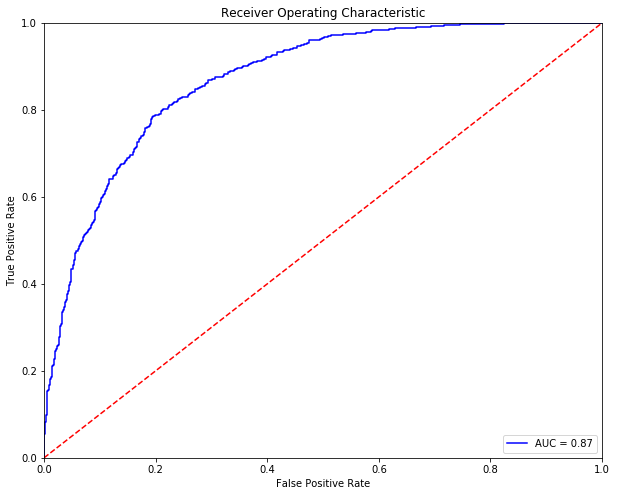

Optimal Threshold is 0.34793016795950626
Accuracy on test data is: 0.7912371134020618


Predicted  False  True  __all__
Actual                         
False       1080   285     1365
True         120   455      575
__all__     1200   740     1940



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,10,auto,0.001,2,2,0,random


Accuracy of the  Extra Decision Tree  model for the training data is: 0.8

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4416  1009     5425
True         543  1792     2335
__all__     4959  2801     7760

Accuracy of the  Extra Decision Tree  model for test data is: 0.7917525773195876

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1114   251     1365
True         153   422      575
__all__     1267   673     1940

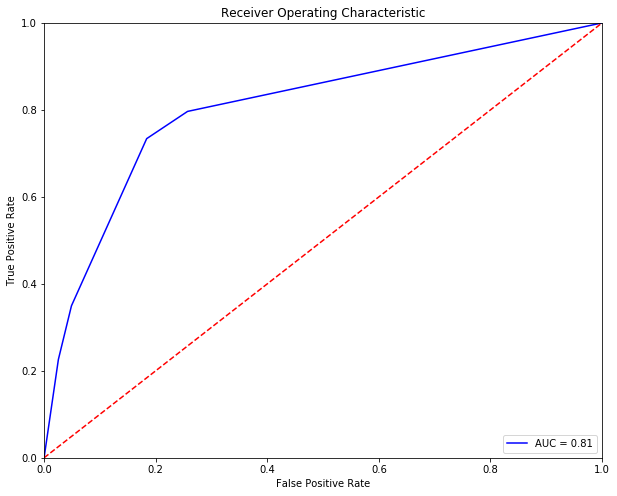

Optimal Threshold is 0.2837370242214533
Accuracy on test data is: 0.7917525773195876


Predicted  False  True  __all__
Actual                         
False       1114   251     1365
True         153   422      575
__all__     1267   673     1940



Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.6,0.6,300,True,0


Accuracy of the  Bagging  model for the training data is: 0.990979381443299

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       5418     7     5425
True          63  2272     2335
__all__     5481  2279     7760

Accuracy of the  Bagging  model for test data is: 0.8015463917525774

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1168   197     1365
True         188   387      575
__all__     1356   584     1940

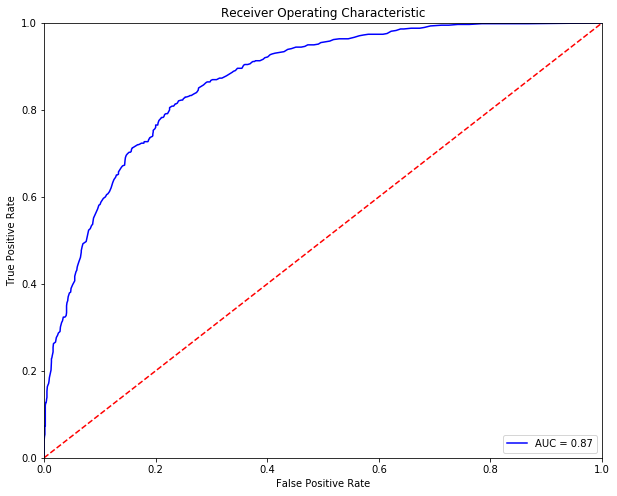

Optimal Threshold is 0.36666666666666664
Accuracy on test data is: 0.7855670103092783


Predicted  False  True  __all__
Actual                         
False       1074   291     1365
True         125   450      575
__all__     1199   741     1940



Neural Network-1
The accuracy of the model on training data is: 0.9265463917525774


Predicted  False  True  __all__
Actual                         
False       5223   202     5425
True         368  1967     2335
__all__     5591  2169     7760

The accuracy of the model on test data is: 0.7731958762886598


Predicted  False  True  __all__
Actual                         
False       1159   206     1365
True         234   341      575
__all__     1393   547     1940

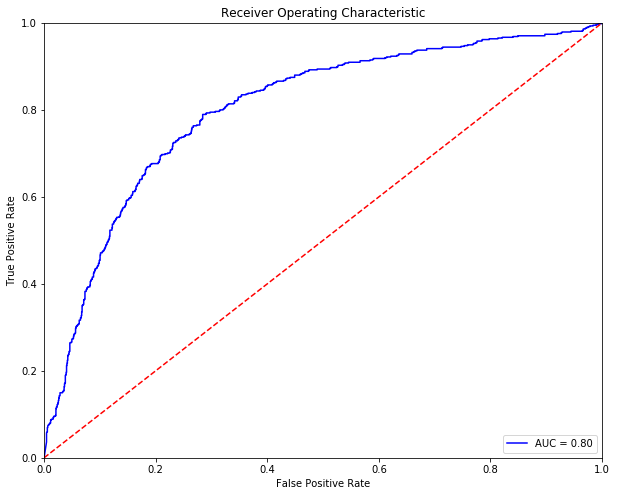

Optimal Threshold is 0.19580643
Accuracy of Logistic Model on training data is: 0.7412371134020619


Predicted  False  True  __all__
Actual                         
False       1011   354     1365
True         148   427      575
__all__     1159   781     1940



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.8min finished


The accuracy of the model on training data is: 0.8070876288659794


Predicted  False  True  __all__
Actual                         
False       4498   927     5425
True         570  1765     2335
__all__     5068  2692     7760

The accuracy of the model on test data is: 0.7984536082474227


Predicted  False  True  __all__
Actual                         
False       1136   229     1365
True         162   413      575
__all__     1298   642     1940

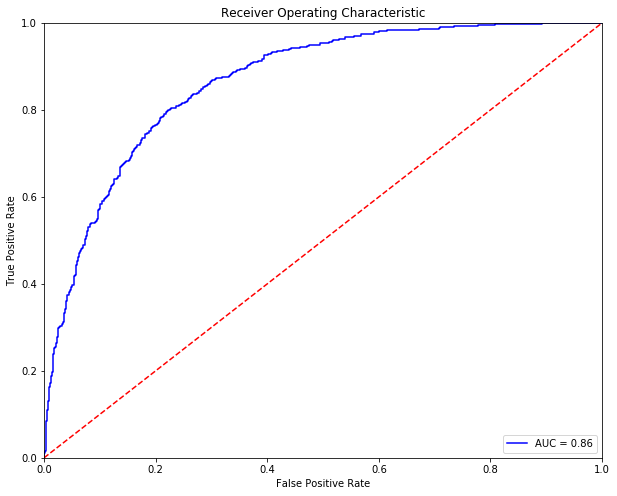

Optimal Threshold is 0.33001688
Accuracy on test data is: 0.7865979381443299


Predicted  False  True  __all__
Actual                         
False       1075   290     1365
True         124   451      575
__all__     1199   741     1940

In [26]:
feat_imp_20=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp_20[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_80_50_20_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_80_50_20_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_80_50_20_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [27]:
table_80_50_20_train['index']=ind_columns
table_80_50_20_test['index']=ind_columns
table_80_50_20_test_roc['index']=ind_columns
table_80_50_20_test.set_index(['index'],drop=True,inplace=True)
table_80_50_20_train.set_index(['index'],drop=True,inplace=True)
table_80_50_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_20_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_20_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,1.000000,2335.0,5425.0,0.0,0.0,0.000000,0.000000
LogisticRegression,0.801289,1801.0,4417.0,1008.0,534.0,0.185806,0.228694
RandomForestClassifier,0.804381,1773.0,4469.0,956.0,562.0,0.176221,0.240685
AdaBoostClassifier,0.808119,1635.0,4636.0,789.0,700.0,0.145438,0.299786
GradientBoostingClassifier,0.820490,1662.0,4705.0,720.0,673.0,0.132719,0.288223
ExtraTreeClassifier,0.800000,1792.0,4416.0,1009.0,543.0,0.185991,0.232548
BaggingClassifier,0.990979,2272.0,5418.0,7.0,63.0,0.001290,0.026981
Neural Network-1,0.926546,1967.0,5223.0,202.0,368.0,0.037235,0.157602
Neural-Network-2,0.807088,1765.0,4498.0,927.0,570.0,0.170876,0.244111


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.798454,357.0,1192.0,173.0,218.0,0.126740,0.379130
LogisticRegression,0.794845,422.0,1120.0,245.0,153.0,0.179487,0.266087
RandomForestClassifier,0.800000,420.0,1132.0,233.0,155.0,0.170696,0.269565
AdaBoostClassifier,0.800000,384.0,1168.0,197.0,191.0,0.144322,0.332174
GradientBoostingClassifier,0.806186,384.0,1180.0,185.0,191.0,0.135531,0.332174
ExtraTreeClassifier,0.791753,422.0,1114.0,251.0,153.0,0.183883,0.266087
BaggingClassifier,0.801546,387.0,1168.0,197.0,188.0,0.144322,0.326957
Neural Network-1,0.773196,341.0,1159.0,206.0,234.0,0.150916,0.406957
Neural-Network-2,0.798454,413.0,1136.0,229.0,162.0,0.167766,0.281739


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.787113,452.0,1075.0,290.0,123.0,0.212454,0.213913,0.319958,0.856829
LogisticRegression,0.783505,450.0,1070.0,295.0,125.0,0.216117,0.217391,0.460601,0.864189
RandomForestClassifier,0.786082,452.0,1073.0,292.0,123.0,0.213919,0.213913,0.288199,0.841715
AdaBoostClassifier,0.785567,450.0,1074.0,291.0,125.0,0.213187,0.217391,0.481456,0.864619
GradientBoostingClassifier,0.791237,455.0,1080.0,285.0,120.0,0.208791,0.208696,0.347930,0.870639
ExtraTreeClassifier,0.791753,422.0,1114.0,251.0,153.0,0.183883,0.266087,0.283737,0.806011
BaggingClassifier,0.785567,450.0,1074.0,291.0,125.0,0.213187,0.217391,0.366667,0.866716
Neural Network-1,0.741237,427.0,1011.0,354.0,148.0,0.259341,0.257391,0.195806,0.801379
Neural-Network-2,0.786598,451.0,1075.0,290.0,124.0,0.212454,0.215652,0.330017,0.864984


In [28]:
table_80_50_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

table_80_50_train_avg['accuracy']=(table_80_50_train['accuracy']+table_80_50_10_train['accuracy']+table_80_50_20_train['accuracy'])/3.0
table_80_50_train_avg['FPR']=(table_80_50_train['FPR']+table_80_50_10_train['FPR']+table_80_50_20_train['FPR'])/3.0
table_80_50_train_avg['FNR']=(table_80_50_train['FNR']+table_80_50_10_train['FNR']+table_80_50_20_train['FNR'])/3.0

table_80_50_test_avg['accuracy']=(table_80_50_test['accuracy']+table_80_50_10_test['accuracy']+table_80_50_20_test['accuracy'])/3.0
table_80_50_test_avg['FPR']=(table_80_50_test['FPR']+table_80_50_10_test['FPR']+table_80_50_20_test['FPR'])/3.0
table_80_50_test_avg['FNR']=(table_80_50_test['FNR']+table_80_50_10_test['FNR']+table_80_50_20_test['FNR'])/3.0

table_80_50_test_roc_avg['accuracy']=(table_80_50_test_roc['accuracy']+table_80_50_10_test_roc['accuracy']+table_80_50_20_test_roc['accuracy'])/3.0
table_80_50_test_roc_avg['FPR']=(table_80_50_test_roc['FPR']+table_80_50_10_test_roc['FPR']+table_80_50_20_test_roc['FPR'])/3.0
table_80_50_test_roc_avg['FNR']=(table_80_50_test_roc['FNR']+table_80_50_10_test_roc['FNR']+table_80_50_20_test_roc['FNR'])/3.0
table_80_50_test_roc_avg['auc']=(table_80_50_test_roc['auc']+table_80_50_10_test_roc['auc']+table_80_50_20_test_roc['auc'])/3.0


print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_80_50_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_test_roc_avg)


feat_imp_80_50=list(map(sum, zip(feat_imp,feat_imp_10,feat_imp_20)))
print("Average feature imortance for the 3 random sets:")
feat_impt_plot(sum(feat_imp_80_50)/12)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


,accuracy,FPR,FNR
index,,,
KNeighborsClassifier,1.000000,0.000000,0.000000
LogisticRegression,0.805412,0.179888,0.228979
RandomForestClassifier,0.807345,0.170747,0.243892
AdaBoostClassifier,0.812371,0.147031,0.282657
GradientBoostingClassifier,0.820619,0.132598,0.288778
ExtraTreeClassifier,0.806271,0.159387,0.274375
BaggingClassifier,0.954596,0.021071,0.102460
Neural Network-1,0.921692,0.038716,0.171028
Neural-Network-2,0.811469,0.161728,0.251191


Comparision Table for Test Accuracies:


,accuracy,FPR,FNR
index,,,
KNeighborsClassifier,0.798969,0.126885,0.372242
LogisticRegression,0.808076,0.170165,0.242527
RandomForestClassifier,0.810653,0.162079,0.252708
AdaBoostClassifier,0.806014,0.146333,0.304103
GradientBoostingClassifier,0.812715,0.134803,0.309088
ExtraTreeClassifier,0.805155,0.157002,0.281520
BaggingClassifier,0.809622,0.139207,0.308992
Neural Network-1,0.778694,0.140890,0.406813
Neural-Network-2,0.810653,0.156183,0.266468


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,FPR,FNR,auc
index,,,,
KNeighborsClassifier,0.796048,0.203666,0.204621,0.865346
LogisticRegression,0.797766,0.201896,0.203028,0.873556
RandomForestClassifier,0.800344,0.199421,0.200184,0.856289
AdaBoostClassifier,0.798969,0.199442,0.204755,0.869149
GradientBoostingClassifier,0.802062,0.197728,0.198424,0.878437
ExtraTreeClassifier,0.803952,0.167956,0.260998,0.844569
BaggingClassifier,0.797938,0.200401,0.205865,0.877104
Neural Network-1,0.759107,0.240804,0.241060,0.806679
Neural-Network-2,0.799656,0.199695,0.201852,0.872397


Average feature imortance for the 3 random sets:


###  <a id='1.B' style="text-decoration : none; color : #000000;">B. 70:30 Train Test Split</a>
#### Random State 0

In [29]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_0.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

## Table to store training and test measures
table_70_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dcafa2634bb293a127a,4568,42,49,57,1200,5038,146.820762,56.766574,78.731441,5765.397777,184063.583962,578,185,138,268,205,180,149,136,156,104,120,158,254,116,207,118,134,215,177,142,343,221,295,439
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d8142614e2006d9d3c,16,4,6,5,7,16,5.937500,9.375000,34.125000,1506.000000,3370.125000,0,0,0,0,0,0,0,0,0,0,2,3,2,0,0,0,7,0,2,0,0,0,0,0


1 -> Infected
0 -> Uninfected


User
5dc9764f82690bd5cfc1543d01592babe19f95cd06152dcafa2634bb293a127a    1
c4e3bf47b9246e59737a10a48fa2f17b3108b8b8a154d5d8142614e2006d9d3c    0
d348da18a4a8399e475122a0c73774f25fc9e7a1e047cf13843f8937afc814cc    0
ebf7553759a0cdbba0add7b038d6fab41a22dead2830bb0c35b18bfab37a2218    0
edec2b03986c67647a3e7b653f30189e134e546ae0da8b2a8e77660c60bbef5a    0
Name: Target, dtype: int64

The train/test split ratio is 70:30


K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,manhattan,30,distance


Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4771     0     4771
True           0  2019     2019
__all__     4771  2019     6790

Accuracy of the  KNN  model for test data is: 0.8051546391752578

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1789   230     2019
True         337   554      891
__all__     2126   784     2910

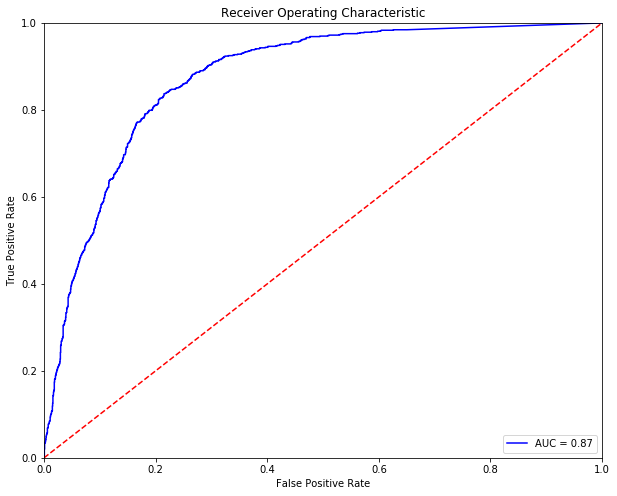

Optimal Threshold is 0.3280563264636047
Accuracy on test data is: 0.8051546391752578


Predicted  False  True  __all__
Actual                         
False       1626   393     2019
True         174   717      891
__all__     1800  1110     2910



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.3,False,False,0.5,100,multinomial,l2,sag,0.1


Accuracy of the  Logistic  model for the training data is: 0.8036818851251841

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3921   850     4771
True         483  1536     2019
__all__     4404  2386     6790

Accuracy of the  Logistic  model for test data is: 0.8219931271477663

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1693   326     2019
True         192   699      891
__all__     1885  1025     2910

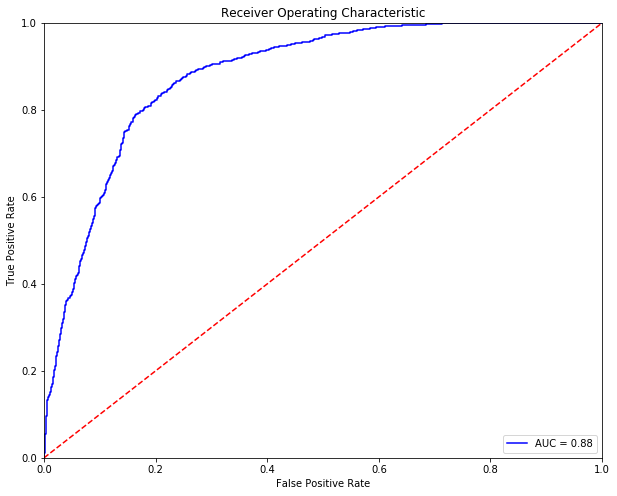

Optimal Threshold is 0.47345742536567864
Accuracy on test data is: 0.8089347079037801


Predicted  False  True  __all__
Actual                         
False       1634   385     2019
True         171   720      891
__all__     1805  1105     2910



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,300,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.8047128129602357

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3952   819     4771
True         507  1512     2019
__all__     4459  2331     6790

Accuracy of the  Random Forest Trees  model for test data is: 0.8195876288659794

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1690   329     2019
True         196   695      891
__all__     1886  1024     2910

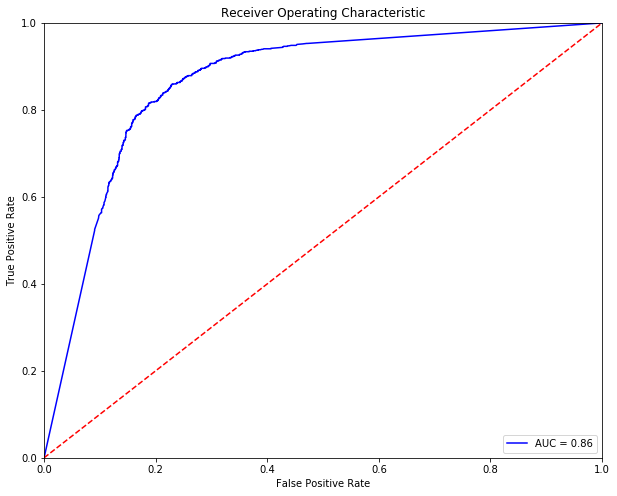

Optimal Threshold is 0.3893607990085983
Accuracy on test data is: 0.8130584192439863


Predicted  False  True  __all__
Actual                         
False       1641   378     2019
True         166   725      891
__all__     1807  1103     2910



Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,1.5,150,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8108983799705449

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4060   711     4771
True         573  1446     2019
__all__     4633  2157     6790

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8017182130584193

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1711   308     2019
True         269   622      891
__all__     1980   930     2910

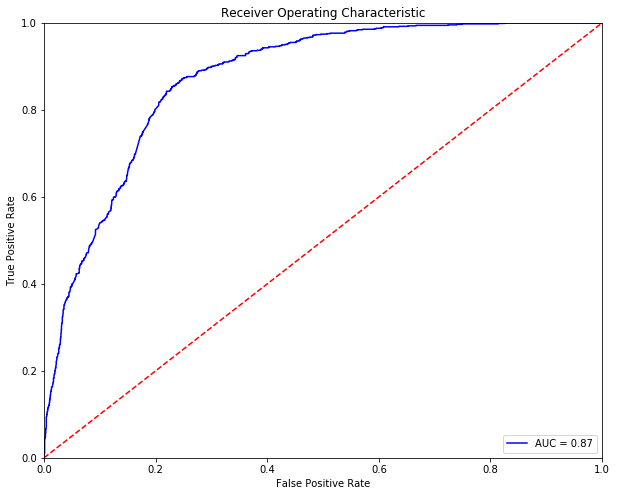

Optimal Threshold is 0.4961965991612081
Accuracy on test data is: 0.8003436426116839


Predicted  False  True  __all__
Actual                         
False       1618   401     2019
True         180   711      891
__all__     1798  1112     2910



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.03,deviance,5,0.3,150,0,0.7


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8131075110456554

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4114   657     4771
True         612  1407     2019
__all__     4726  2064     6790

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8195876288659794

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1750   269     2019
True         256   635      891
__all__     2006   904     2910

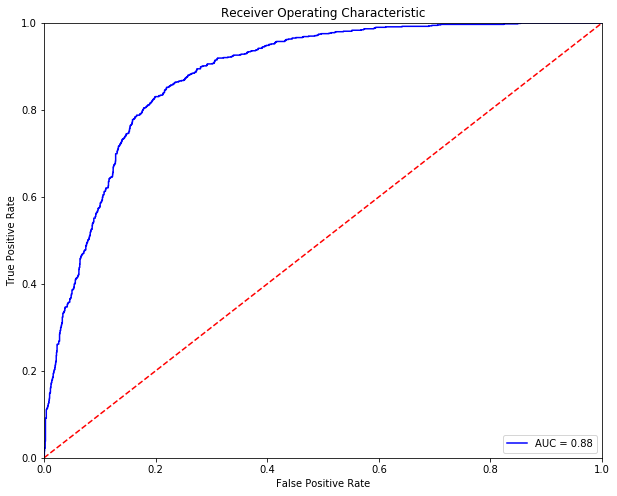

Optimal Threshold is 0.3743887751185962
Accuracy on test data is: 0.8116838487972509


Predicted  False  True  __all__
Actual                         
False       1639   380     2019
True         168   723      891
__all__     1807  1103     2910



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,entropy,10,auto,0.001,2,5,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.8135493372606775

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4029   742     4771
True         524  1495     2019
__all__     4553  2237     6790

Accuracy of the  Extra Decision Tree  model for test data is: 0.8140893470790378

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1713   306     2019
True         235   656      891
__all__     1948   962     2910

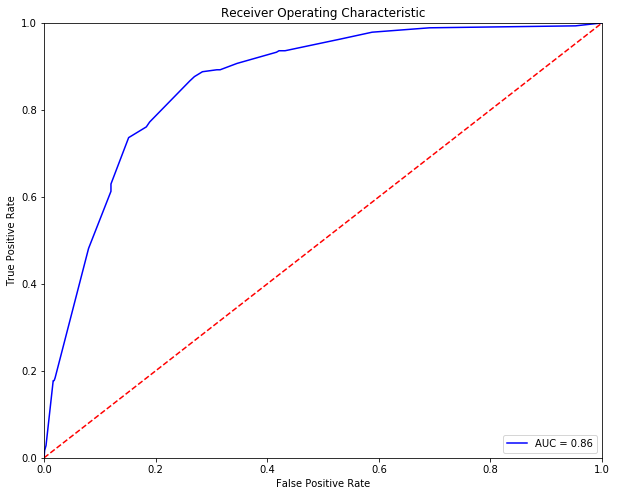

Optimal Threshold is 0.37037037037037035
Accuracy on test data is: 0.7996563573883162


Predicted  False  True  __all__
Actual                         
False       1649   370     2019
True         213   678      891
__all__     1862  1048     2910



Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.6,0.6,300,True,0


Accuracy of the  Bagging  model for the training data is: 0.9885125184094257

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4759    12     4771
True          66  1953     2019
__all__     4825  1965     6790

Accuracy of the  Bagging  model for test data is: 0.8130584192439863

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1744   275     2019
True         269   622      891
__all__     2013   897     2910

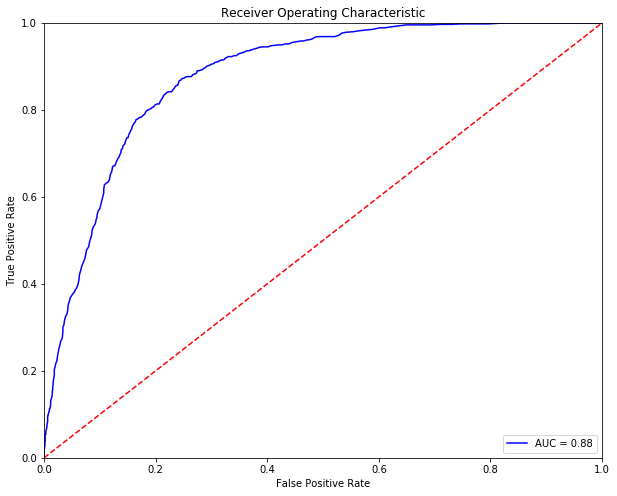

Optimal Threshold is 0.3933333333333333
Accuracy on test data is: 0.8061855670103093


Predicted  False  True  __all__
Actual                         
False       1630   389     2019
True         175   716      891
__all__     1805  1105     2910



Neural Network-1
The accuracy of the model on training data is: 0.9268041237113402


Predicted  False  True  __all__
Actual                         
False       4587   184     4771
True         313  1706     2019
__all__     4900  1890     6790

The accuracy of the model on test data is: 0.7604810996563574


Predicted  False  True  __all__
Actual                         
False       1712   307     2019
True         390   501      891
__all__     2102   808     2910

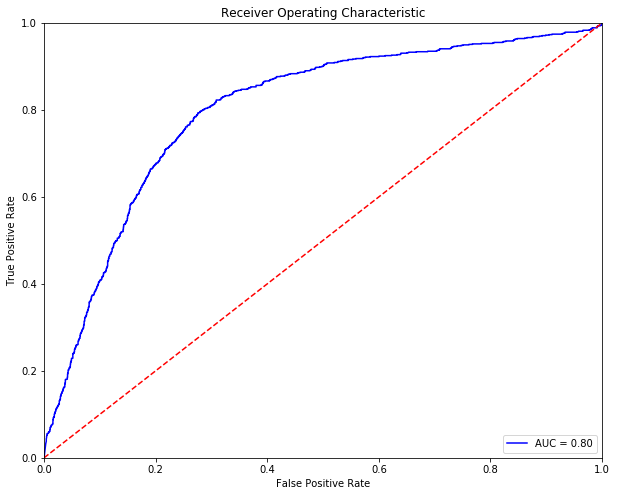

Optimal Threshold is 0.1805562
Accuracy of Logistic Model on training data is: 0.7508591065292096


Predicted  False  True  __all__
Actual                         
False       1516   503     2019
True         222   669      891
__all__     1738  1172     2910



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.4min finished


The accuracy of the model on training data is: 0.8079528718703977


Predicted  False  True  __all__
Actual                         
False       4026   745     4771
True         559  1460     2019
__all__     4585  2205     6790

The accuracy of the model on test data is: 0.8206185567010309


Predicted  False  True  __all__
Actual                         
False       1723   296     2019
True         226   665      891
__all__     1949   961     2910

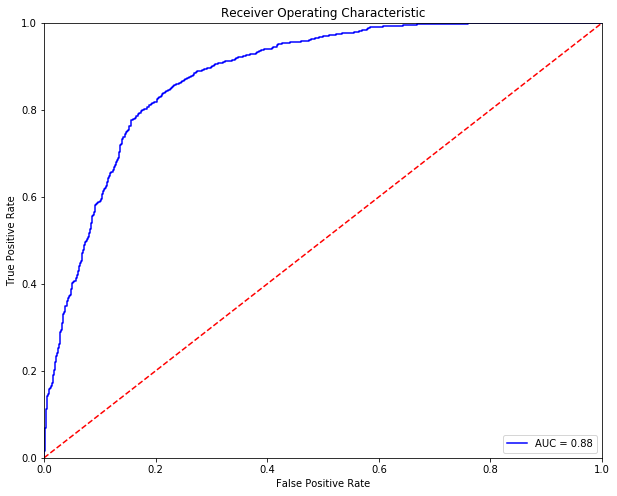

Optimal Threshold is 0.3553364
Accuracy on test data is: 0.811340206185567


Predicted  False  True  __all__
Actual                         
False       1640   379     2019
True         170   721      891
__all__     1810  1100     2910

In [30]:
feat_imp=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_70_50_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_70_50_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_70_50_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [31]:
table_70_50_train['index']=ind_columns
table_70_50_test['index']=ind_columns
table_70_50_test_roc['index']=ind_columns

table_70_50_test.set_index(['index'],drop=True,inplace=True)
table_70_50_train.set_index(['index'],drop=True,inplace=True)
table_70_50_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,1.000000,2019.0,4771.0,0.0,0.0,0.000000,0.000000
LogisticRegression,0.803682,1536.0,3921.0,850.0,483.0,0.178160,0.239227
RandomForestClassifier,0.804713,1512.0,3952.0,819.0,507.0,0.171662,0.251114
AdaBoostClassifier,0.810898,1446.0,4060.0,711.0,573.0,0.149025,0.283804
GradientBoostingClassifier,0.813108,1407.0,4114.0,657.0,612.0,0.137707,0.303120
ExtraTreeClassifier,0.813549,1495.0,4029.0,742.0,524.0,0.155523,0.259534
BaggingClassifier,0.988513,1953.0,4759.0,12.0,66.0,0.002515,0.032689
Neural Network-1,0.926804,1706.0,4587.0,184.0,313.0,0.038566,0.155027
Neural-Network-2,0.807953,1460.0,4026.0,745.0,559.0,0.156152,0.276870


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.805155,554.0,1789.0,230.0,337.0,0.113918,0.378227
LogisticRegression,0.821993,699.0,1693.0,326.0,192.0,0.161466,0.215488
RandomForestClassifier,0.819588,695.0,1690.0,329.0,196.0,0.162952,0.219978
AdaBoostClassifier,0.801718,622.0,1711.0,308.0,269.0,0.152551,0.301908
GradientBoostingClassifier,0.819588,635.0,1750.0,269.0,256.0,0.133234,0.287318
ExtraTreeClassifier,0.814089,656.0,1713.0,306.0,235.0,0.151560,0.263749
BaggingClassifier,0.813058,622.0,1744.0,275.0,269.0,0.136206,0.301908
Neural Network-1,0.760481,501.0,1712.0,307.0,390.0,0.152055,0.437710
Neural-Network-2,0.820619,665.0,1723.0,296.0,226.0,0.146607,0.253648


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.805155,717.0,1626.0,393.0,174.0,0.194651,0.195286,0.328056,0.874659
LogisticRegression,0.808935,720.0,1634.0,385.0,171.0,0.190688,0.191919,0.473457,0.881591
RandomForestClassifier,0.813058,725.0,1641.0,378.0,166.0,0.187221,0.186308,0.389361,0.864460
AdaBoostClassifier,0.800344,711.0,1618.0,401.0,180.0,0.198613,0.202020,0.496197,0.873102
GradientBoostingClassifier,0.811684,723.0,1639.0,380.0,168.0,0.188212,0.188552,0.374389,0.882833
ExtraTreeClassifier,0.799656,678.0,1649.0,370.0,213.0,0.183259,0.239057,0.370370,0.864839
BaggingClassifier,0.806186,716.0,1630.0,389.0,175.0,0.192670,0.196409,0.393333,0.879012
Neural Network-1,0.750859,669.0,1516.0,503.0,222.0,0.249133,0.249158,0.180556,0.798488
Neural-Network-2,0.811340,721.0,1640.0,379.0,170.0,0.187717,0.190797,0.355336,0.881493


#### Random State 10

In [32]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_10.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

## Table to store training and test measures
table_70_50_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c420a510d83a4c8d5e70f0fa79b896008585c400807126e0dd367ef0eecebeb6,80,8,12,4,37,83,302.084337,170.180723,63.951807,15306.156627,407432.662651,4,0,1,7,1,2,1,0,0,7,12,5,6,0,6,0,1,3,6,5,3,2,11,0
059e225e600d51b34c32768dc16436d7ad6965e7428e90584c9fb25b9825bc68,548,8,19,8,205,554,510.418773,159.868231,45.395307,13566.797834,655119.371841,0,0,0,0,0,0,0,0,0,0,0,105,10,253,116,23,3,9,32,3,0,0,0,0


1 -> Infected
0 -> Uninfected


User
c420a510d83a4c8d5e70f0fa79b896008585c400807126e0dd367ef0eecebeb6    0
059e225e600d51b34c32768dc16436d7ad6965e7428e90584c9fb25b9825bc68    0
b384a39ab44eec7cfd2e093a0daa02cb8a31a5de2074be25a8cb7080b7bc2b4b    1
60a7e83d06013e0ecddb5488d101b31bdc44a0738f64667b46945011e3061980    0
d4ef6b0efdda4db1f34072faa7922be1c6d401feff238cbd5537ac6d707ac431    0
Name: Target, dtype: int64

The train/test split ratio is 70:30


K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,euclidean,50,uniform


Accuracy of the  KNN  model for the training data is: 0.8192930780559646

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4148   614     4762
True         613  1415     2028
__all__     4761  2029     6790

Accuracy of the  KNN  model for test data is: 0.8017182130584193

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1744   284     2028
True         293   589      882
__all__     2037   873     2910

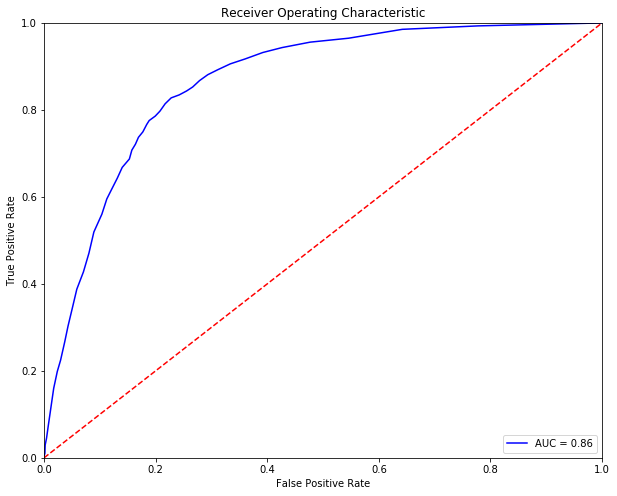

Optimal Threshold is 0.34
Accuracy on test data is: 0.7962199312714776


Predicted  False  True  __all__
Actual                         
False       1624   404     2028
True         189   693      882
__all__     1813  1097     2910



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.3,False,False,0.5,50,multinomial,l2,sag,0.1


Accuracy of the  Logistic  model for the training data is: 0.8151693667157585

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3957   805     4762
True         450  1578     2028
__all__     4407  2383     6790

Accuracy of the  Logistic  model for test data is: 0.8027491408934708

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1667   361     2028
True         213   669      882
__all__     1880  1030     2910

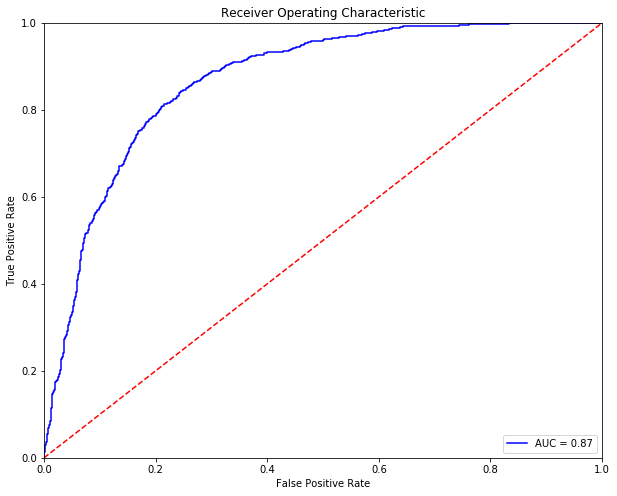

Optimal Threshold is 0.4608624055047913
Accuracy on test data is: 0.7955326460481099


Predicted  False  True  __all__
Actual                         
False       1614   414     2028
True         181   701      882
__all__     1795  1115     2910



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,300,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.814580265095729

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3989   773     4762
True         486  1542     2028
__all__     4475  2315     6790

Accuracy of the  Random Forest Trees  model for test data is: 0.806872852233677

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1685   343     2028
True         219   663      882
__all__     1904  1006     2910

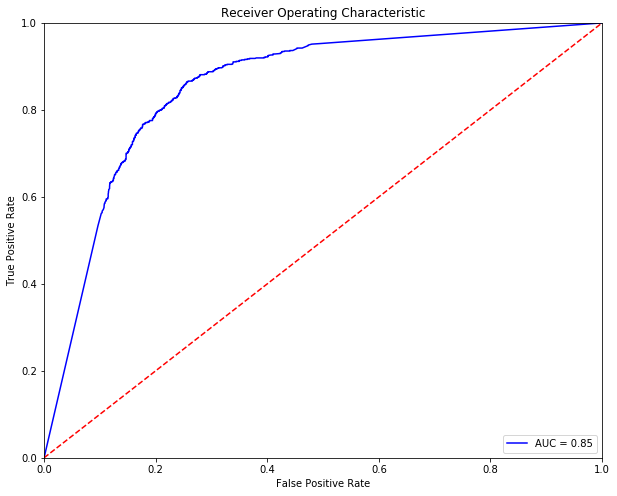

Optimal Threshold is 0.314045789722947
Accuracy on test data is: 0.7965635738831615


Predicted  False  True  __all__
Actual                         
False       1616   412     2028
True         180   702      882
__all__     1796  1114     2910



Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,0.5,400,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8153166421207658

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3962   800     4762
True         454  1574     2028
__all__     4416  2374     6790

Accuracy of the  AdaBoostClassifier  model for test data is: 0.802405498281787

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1674   354     2028
True         221   661      882
__all__     1895  1015     2910

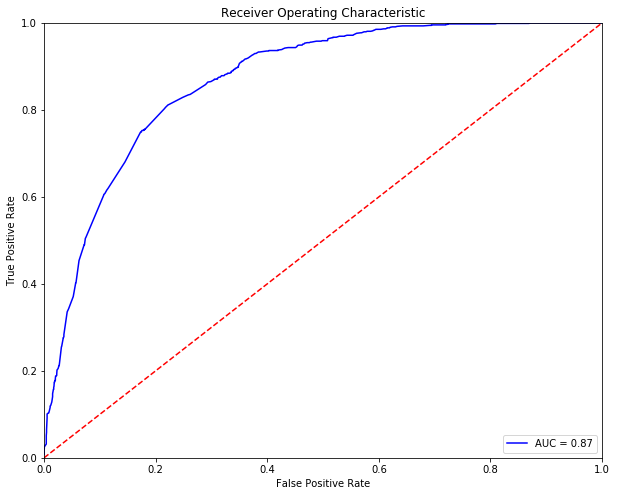

Optimal Threshold is 0.48171434695302473
Accuracy on test data is: 0.7996563573883162


Predicted  False  True  __all__
Actual                         
False       1660   368     2028
True         215   667      882
__all__     1875  1035     2910



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.03,deviance,20,0.3,150,0,0.5


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8216494845360824

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4079   683     4762
True         528  1500     2028
__all__     4607  2183     6790

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8072164948453608

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1724   304     2028
True         257   625      882
__all__     1981   929     2910

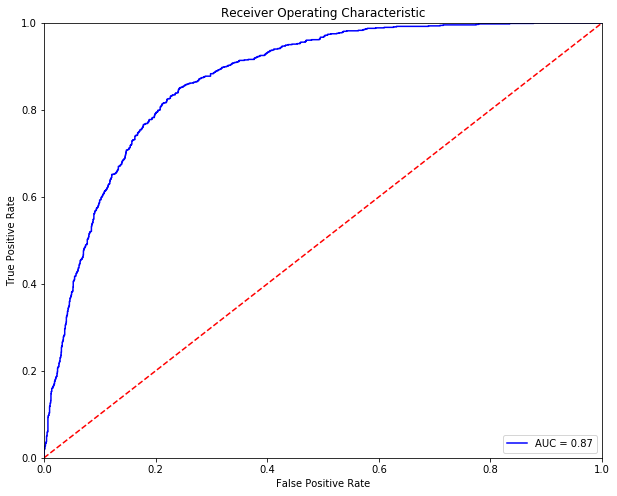

Optimal Threshold is 0.32842629271620616
Accuracy on test data is: 0.7965635738831615


Predicted  False  True  __all__
Actual                         
False       1616   412     2028
True         180   702      882
__all__     1796  1114     2910



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,10,auto,0.001,5,2,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.8163475699558174

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4127   635     4762
True         612  1416     2028
__all__     4739  2051     6790

Accuracy of the  Extra Decision Tree  model for test data is: 0.8041237113402062

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1732   296     2028
True         274   608      882
__all__     2006   904     2910

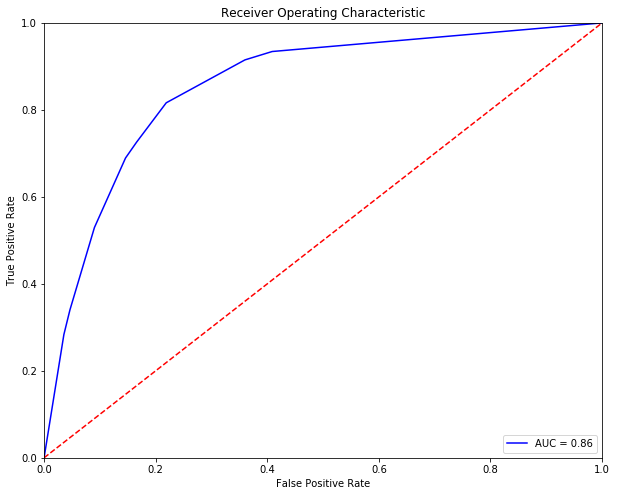

Optimal Threshold is 0.37945492662473795
Accuracy on test data is: 0.8013745704467354


Predicted  False  True  __all__
Actual                         
False       1692   336     2028
True         242   640      882
__all__     1934   976     2910



Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.4,0.3,200,True,0


Accuracy of the  Bagging  model for the training data is: 0.9232695139911635

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4579   183     4762
True         338  1690     2028
__all__     4917  1873     6790

Accuracy of the  Bagging  model for test data is: 0.8048109965635739

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1735   293     2028
True         275   607      882
__all__     2010   900     2910

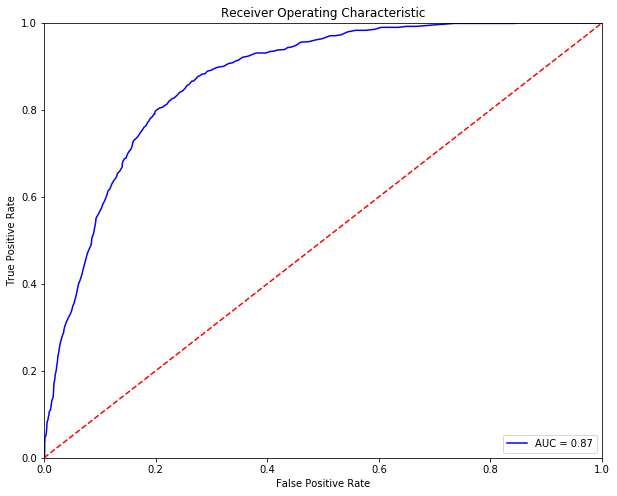

Optimal Threshold is 0.37
Accuracy on test data is: 0.7993127147766323


Predicted  False  True  __all__
Actual                         
False       1625   403     2028
True         181   701      882
__all__     1806  1104     2910



Neural Network-1
The accuracy of the model on training data is: 0.9241531664212077


Predicted  False  True  __all__
Actual                         
False       4636   126     4762
True         389  1639     2028
__all__     5025  1765     6790

The accuracy of the model on test data is: 0.7742268041237114


Predicted  False  True  __all__
Actual                         
False       1754   274     2028
True         383   499      882
__all__     2137   773     2910

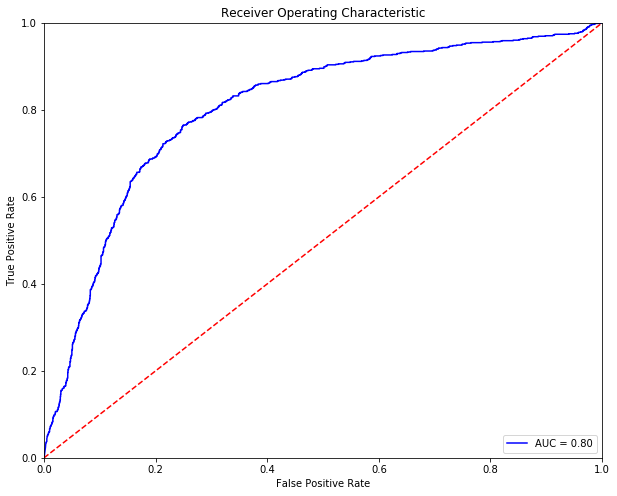

Optimal Threshold is 0.17075413
Accuracy of Logistic Model on training data is: 0.7539518900343642


Predicted  False  True  __all__
Actual                         
False       1529   499     2028
True         217   665      882
__all__     1746  1164     2910



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.3min finished


The accuracy of the model on training data is: 0.81620029455081


Predicted  False  True  __all__
Actual                         
False       4017   745     4762
True         503  1525     2028
__all__     4520  2270     6790

The accuracy of the model on test data is: 0.8058419243986255


Predicted  False  True  __all__
Actual                         
False       1695   333     2028
True         232   650      882
__all__     1927   983     2910

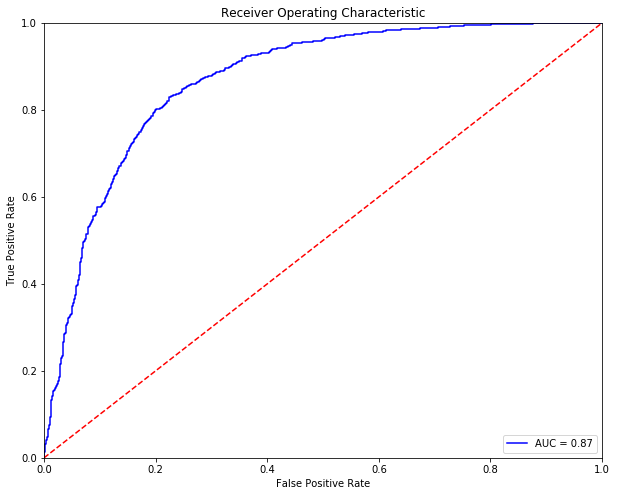

Optimal Threshold is 0.34272757
Accuracy on test data is: 0.8006872852233677


Predicted  False  True  __all__
Actual                         
False       1625   403     2028
True         177   705      882
__all__     1802  1108     2910

In [33]:
feat_imp_10=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp_10[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_70_50_10_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_70_50_10_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_70_50_10_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [34]:
table_70_50_10_train['index']=ind_columns
table_70_50_10_test['index']=ind_columns
table_70_50_10_test_roc['index']=ind_columns

table_70_50_10_test.set_index(['index'],drop=True,inplace=True)
table_70_50_10_train.set_index(['index'],drop=True,inplace=True)
table_70_50_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_10_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_10_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.819293,1415.0,4148.0,614.0,613.0,0.128937,0.302268
LogisticRegression,0.815169,1578.0,3957.0,805.0,450.0,0.169047,0.221893
RandomForestClassifier,0.814580,1542.0,3989.0,773.0,486.0,0.162327,0.239645
AdaBoostClassifier,0.815317,1574.0,3962.0,800.0,454.0,0.167997,0.223866
GradientBoostingClassifier,0.821649,1500.0,4079.0,683.0,528.0,0.143427,0.260355
ExtraTreeClassifier,0.816348,1416.0,4127.0,635.0,612.0,0.133347,0.301775
BaggingClassifier,0.923270,1690.0,4579.0,183.0,338.0,0.038429,0.166667
Neural Network-1,0.924153,1639.0,4636.0,126.0,389.0,0.026459,0.191815
Neural-Network-2,0.816200,1525.0,4017.0,745.0,503.0,0.156447,0.248028


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.801718,589.0,1744.0,284.0,293.0,0.140039,0.332200
LogisticRegression,0.802749,669.0,1667.0,361.0,213.0,0.178008,0.241497
RandomForestClassifier,0.806873,663.0,1685.0,343.0,219.0,0.169132,0.248299
AdaBoostClassifier,0.802405,661.0,1674.0,354.0,221.0,0.174556,0.250567
GradientBoostingClassifier,0.807216,625.0,1724.0,304.0,257.0,0.149901,0.291383
ExtraTreeClassifier,0.804124,608.0,1732.0,296.0,274.0,0.145957,0.310658
BaggingClassifier,0.804811,607.0,1735.0,293.0,275.0,0.144477,0.311791
Neural Network-1,0.774227,499.0,1754.0,274.0,383.0,0.135108,0.434240
Neural-Network-2,0.805842,650.0,1695.0,333.0,232.0,0.164201,0.263039


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.796220,693.0,1624.0,404.0,189.0,0.199211,0.214286,0.340000,0.864378
LogisticRegression,0.795533,701.0,1614.0,414.0,181.0,0.204142,0.205215,0.460862,0.868153
RandomForestClassifier,0.796564,702.0,1616.0,412.0,180.0,0.203156,0.204082,0.314046,0.854945
AdaBoostClassifier,0.799656,667.0,1660.0,368.0,215.0,0.181460,0.243764,0.481714,0.868278
GradientBoostingClassifier,0.796564,702.0,1616.0,412.0,180.0,0.203156,0.204082,0.328426,0.872532
ExtraTreeClassifier,0.801375,640.0,1692.0,336.0,242.0,0.165680,0.274376,0.379455,0.855462
BaggingClassifier,0.799313,701.0,1625.0,403.0,181.0,0.198718,0.205215,0.370000,0.870468
Neural Network-1,0.753952,665.0,1529.0,499.0,217.0,0.246055,0.246032,0.170754,0.803664
Neural-Network-2,0.800687,705.0,1625.0,403.0,177.0,0.198718,0.200680,0.342728,0.868525


#### Random State 20

In [35]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_12_24_random_state_20.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

## Table to store training and test measures
table_70_50_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


0    6790
1    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,BYR,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5f5a2b60a4480e331c,85,2,2,1,5,86,2.523256,1.813953,30.546512,157.523256,2244.197674,6,38,1,5,0,8,1,0,6,2,2,0,1,5,6,1,0,1,0,0,0,0,0,3
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e107c9b0e15a44099a,358,6,13,8,133,363,22.209366,12.785124,63.633609,2778.881543,24241.719008,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,161,93,61,44,0,0


1 -> Infected
0 -> Uninfected


User
76546ddef3b300c7c78949ef91f26b639597aef703cd7e5f5a2b60a4480e331c    0
93c1a633ff4c7103ae527c8be010d969fa1815c6273b08e107c9b0e15a44099a    0
4ba926e44bbc5718a83b0a3d37d4b38344b8413313a380c59079fb0ac246f6d8    1
f27f0a15e884be036824b69b19111caa9597b97f2bbd91941e15671027811583    0
d80a556c9a21d199c8e0b539e665a577a1c38c2a1d6172c68c634889aa7a1c6e    1
Name: Target, dtype: int64

The train/test split ratio is 70:30


K-Nearest Neighbors
Best Parameters are :


,0,1,2,3,4
index,algorithm,leaf_size,metric,n_neighbors,weights
0,auto,2,manhattan,50,distance


Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4760     0     4760
True           0  2030     2030
__all__     4760  2030     6790

Accuracy of the  KNN  model for test data is: 0.8006872852233677

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1799   231     2030
True         349   531      880
__all__     2148   762     2910

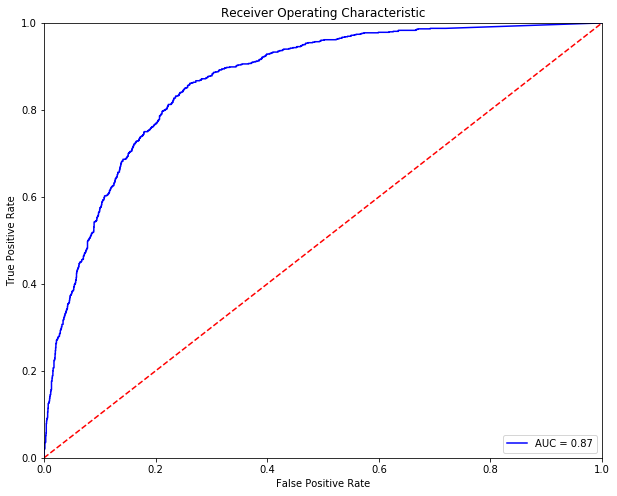

Optimal Threshold is 0.3153641429614048
Accuracy on test data is: 0.7900343642611684


Predicted  False  True  __all__
Actual                         
False       1604   426     2030
True         185   695      880
__all__     1789  1121     2910



Logistic Regression
Best Parameters are :


,0,1,2,3,4,5,6,7,8
index,C,dual,fit_intercept,intercept_scaling,max_iter,multi_class,penalty,solver,tol
0,0.5,False,False,0.7,50,multinomial,l2,sag,0.1


Accuracy of the  Logistic  model for the training data is: 0.8

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3866   894     4760
True         464  1566     2030
__all__     4330  2460     6790

Accuracy of the  Logistic  model for test data is: 0.8

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1666   364     2030
True         218   662      880
__all__     1884  1026     2910

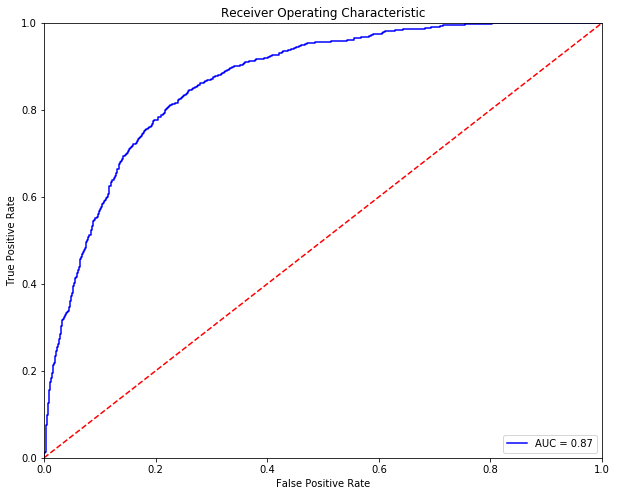

Optimal Threshold is 0.464982402055842
Accuracy on test data is: 0.7879725085910653


Predicted  False  True  __all__
Actual                         
False       1600   430     2030
True         187   693      880
__all__     1787  1123     2910



RandomForest Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7,8,9,10,11
index,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,oob_score,random_state,verbose
0,gini,10,auto,10,0.1,10,10,0.1,300,False,0,0


Accuracy of the  Random Forest Trees  model for the training data is: 0.80279823269514

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3897   863     4760
True         476  1554     2030
__all__     4373  2417     6790

Accuracy of the  Random Forest Trees  model for test data is: 0.8051546391752578

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1687   343     2030
True         224   656      880
__all__     1911   999     2910

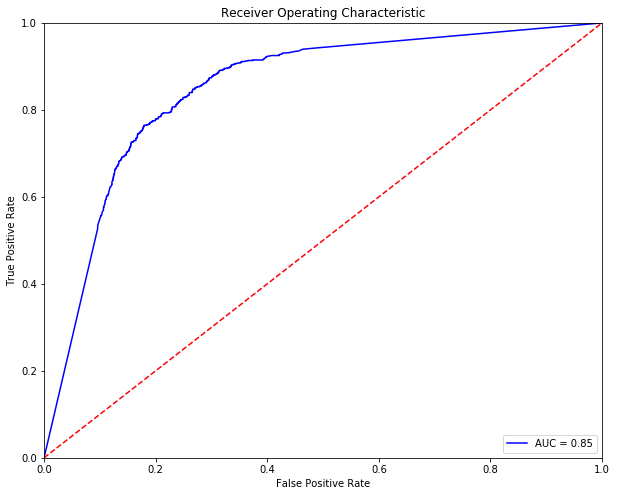

Optimal Threshold is 0.3008433745478374
Accuracy on test data is: 0.7896907216494845


Predicted  False  True  __all__
Actual                         
False       1603   427     2030
True         185   695      880
__all__     1788  1122     2910



Adaoost Classifier
Best Parameters are :


,0,1,2,3
index,algorithm,learning_rate,n_estimators,random_state
0,SAMME,0.5,150,0


Accuracy of the  AdaBoostClassifier  model for the training data is: 0.8076583210603829

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4054   706     4760
True         600  1430     2030
__all__     4654  2136     6790

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8027491408934708

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1735   295     2030
True         279   601      880
__all__     2014   896     2910

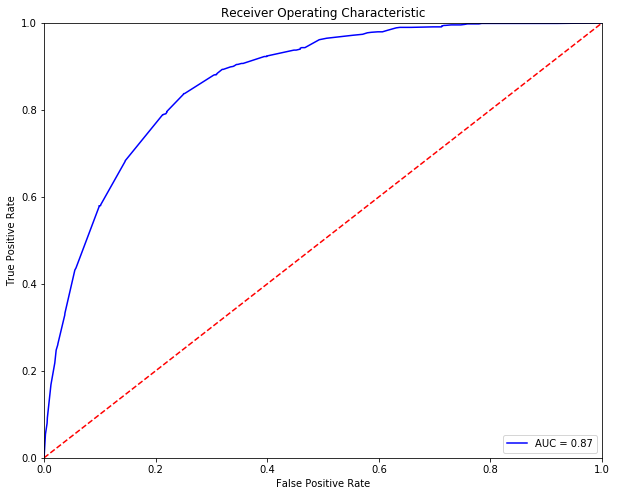

Optimal Threshold is 0.4971831113214528
Accuracy on test data is: 0.8027491408934708


Predicted  False  True  __all__
Actual                         
False       1735   295     2030
True         279   601      880
__all__     2014   896     2910



GradientBoosting Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,learning_rate,loss,min_samples_leaf,min_samples_split,n_estimators,random_state,subsample
0,mse,0.03,exponential,20,0.3,150,0,0.5


Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.8132547864506627

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4099   661     4760
True         607  1423     2030
__all__     4706  2084     6790

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8041237113402062

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1756   274     2030
True         296   584      880
__all__     2052   858     2910

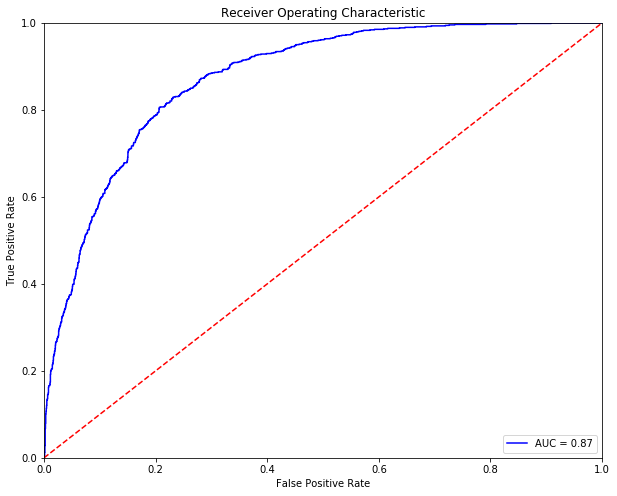

Optimal Threshold is 0.34657903568600507
Accuracy on test data is: 0.7948453608247422


Predicted  False  True  __all__
Actual                         
False       1614   416     2030
True         181   699      880
__all__     1795  1115     2910



ExtraTree Classifier
Best Parameters are :


,0,1,2,3,4,5,6,7
index,criterion,max_depth,max_features,min_impurity_decrease,min_samples_leaf,min_samples_split,random_state,splitter
0,gini,10,auto,0.001,2,2,0,best


Accuracy of the  Extra Decision Tree  model for the training data is: 0.8007363770250369

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       3841   919     4760
True         434  1596     2030
__all__     4275  2515     6790

Accuracy of the  Extra Decision Tree  model for test data is: 0.7986254295532647

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1659   371     2030
True         215   665      880
__all__     1874  1036     2910

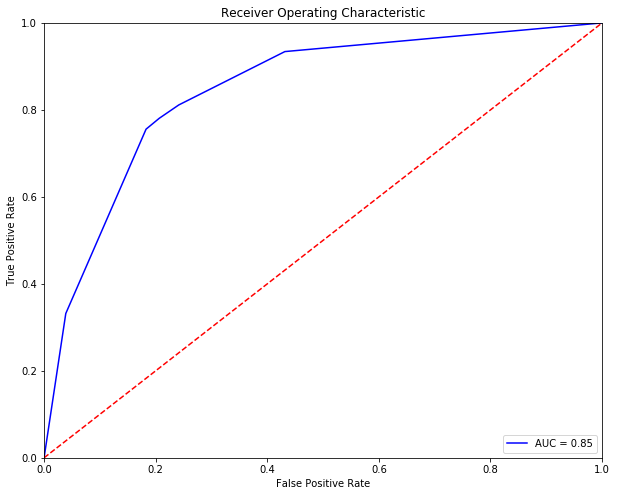

Optimal Threshold is 0.35625
Accuracy on test data is: 0.7986254295532647


Predicted  False  True  __all__
Actual                         
False       1659   371     2030
True         215   665      880
__all__     1874  1036     2910



Bagging Classifier
Best Parameters are :


,0,1,2,3,4,5,6
index,bootstrap,bootstrap_features,max_features,max_samples,n_estimators,oob_score,random_state
0,True,True,0.2,0.6,300,True,0


Accuracy of the  Bagging  model for the training data is: 0.9916053019145803

Confusion Matrix for Training data is:


Predicted  False  True  __all__
Actual                         
False       4753     7     4760
True          50  1980     2030
__all__     4803  1987     6790

Accuracy of the  Bagging  model for test data is: 0.8072164948453608

Confusion Matrix for test data is:


Predicted  False  True  __all__
Actual                         
False       1757   273     2030
True         288   592      880
__all__     2045   865     2910

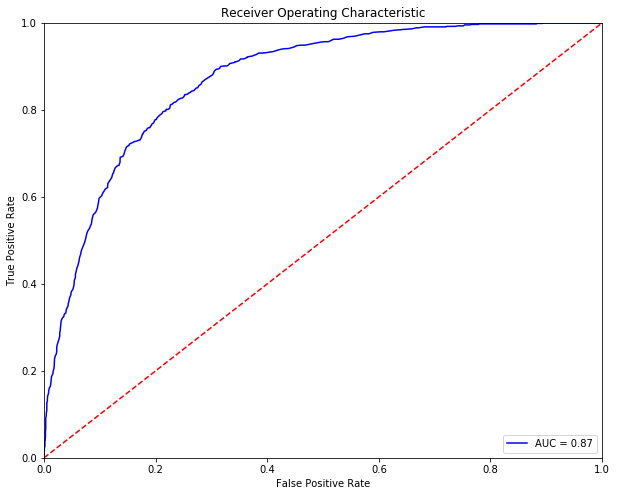

Optimal Threshold is 0.36333333333333334
Accuracy on test data is: 0.7910652920962199


Predicted  False  True  __all__
Actual                         
False       1608   422     2030
True         186   694      880
__all__     1794  1116     2910



Neural Network-1
The accuracy of the model on training data is: 0.9073637702503682


Predicted  False  True  __all__
Actual                         
False       4416   344     4760
True         285  1745     2030
__all__     4701  2089     6790

The accuracy of the model on test data is: 0.770446735395189


Predicted  False  True  __all__
Actual                         
False       1694   336     2030
True         332   548      880
__all__     2026   884     2910

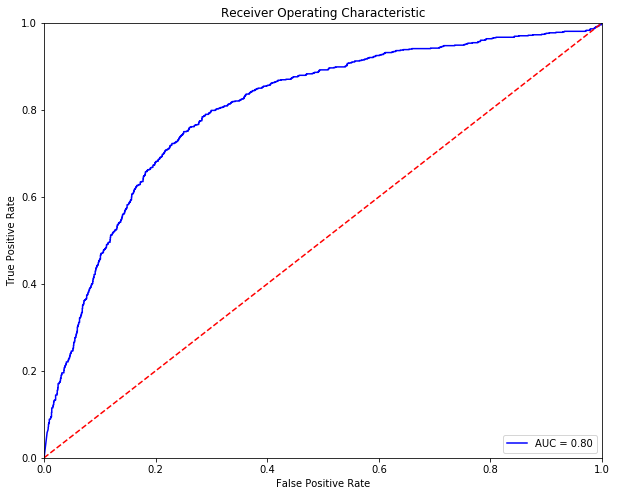

Optimal Threshold is 0.24437463
Accuracy of Logistic Model on training data is: 0.7494845360824742


Predicted  False  True  __all__
Actual                         
False       1522   508     2030
True         221   659      880
__all__     1743  1167     2910



Neural Network-2
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.5min finished


The accuracy of the model on training data is: 0.8066273932253314


Predicted  False  True  __all__
Actual                         
False       4021   739     4760
True         574  1456     2030
__all__     4595  2195     6790

The accuracy of the model on test data is: 0.8092783505154639


Predicted  False  True  __all__
Actual                         
False       1742   288     2030
True         267   613      880
__all__     2009   901     2910

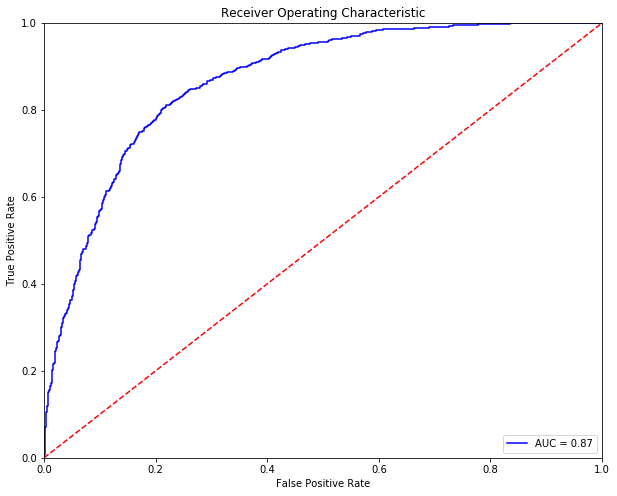

Optimal Threshold is 0.21450813
Accuracy on test data is: 0.7917525773195876


Predicted  False  True  __all__
Actual                         
False       1608   422     2030
True         184   696      880
__all__     1792  1118     2910

In [36]:
feat_imp_20=[None]*4
j=0
for i in range(0,9):
    if i>=2 and i<=5:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc,feat_imp_20[j]=f[i](X_train,Y_train,X_test,Y_test)
        j=j+1
    else:
        model,cm_train,cm_test,acc_train,acc_test,cm,accuracy,threshold,roc_auc=f[i](X_train,Y_train,X_test,Y_test)
    table_70_50_20_train.loc[i]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
    table_70_50_20_test.loc[i] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
    table_70_50_20_test_roc.loc[i]=([accuracy, cm.TP,  cm.TN,   cm.FP, cm.FN,  cm.FPR, cm.FNR, threshold,roc_auc])
    print("\n")

In [37]:
table_70_50_20_train['index']=ind_columns
table_70_50_20_test['index']=ind_columns
table_70_50_20_test_roc['index']=ind_columns

table_70_50_20_test.set_index(['index'],drop=True,inplace=True)
table_70_50_20_train.set_index(['index'],drop=True,inplace=True)
table_70_50_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_20_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_20_test_roc)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,1.000000,2030.0,4760.0,0.0,0.0,0.000000,0.000000
LogisticRegression,0.800000,1566.0,3866.0,894.0,464.0,0.187815,0.228571
RandomForestClassifier,0.802798,1554.0,3897.0,863.0,476.0,0.181303,0.234483
AdaBoostClassifier,0.807658,1430.0,4054.0,706.0,600.0,0.148319,0.295567
GradientBoostingClassifier,0.813255,1423.0,4099.0,661.0,607.0,0.138866,0.299015
ExtraTreeClassifier,0.800736,1596.0,3841.0,919.0,434.0,0.193067,0.213793
BaggingClassifier,0.991605,1980.0,4753.0,7.0,50.0,0.001471,0.024631
Neural Network-1,0.907364,1745.0,4416.0,344.0,285.0,0.072269,0.140394
Neural-Network-2,0.806627,1456.0,4021.0,739.0,574.0,0.155252,0.282759


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
KNeighborsClassifier,0.800687,531.0,1799.0,231.0,349.0,0.113793,0.396591
LogisticRegression,0.800000,662.0,1666.0,364.0,218.0,0.179310,0.247727
RandomForestClassifier,0.805155,656.0,1687.0,343.0,224.0,0.168966,0.254545
AdaBoostClassifier,0.802749,601.0,1735.0,295.0,279.0,0.145320,0.317045
GradientBoostingClassifier,0.804124,584.0,1756.0,274.0,296.0,0.134975,0.336364
ExtraTreeClassifier,0.798625,665.0,1659.0,371.0,215.0,0.182759,0.244318
BaggingClassifier,0.807216,592.0,1757.0,273.0,288.0,0.134483,0.327273
Neural Network-1,0.770447,548.0,1694.0,336.0,332.0,0.165517,0.377273
Neural-Network-2,0.809278,613.0,1742.0,288.0,267.0,0.141872,0.303409


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,TP,TN,FP,FN,FPR,FNR,threshold,auc
index,,,,,,,,,
KNeighborsClassifier,0.790034,695.0,1604.0,426.0,185.0,0.209852,0.210227,0.315364,0.866547
LogisticRegression,0.787973,693.0,1600.0,430.0,187.0,0.211823,0.212500,0.464982,0.866650
RandomForestClassifier,0.789691,695.0,1603.0,427.0,185.0,0.210345,0.210227,0.300843,0.849310
AdaBoostClassifier,0.802749,601.0,1735.0,295.0,279.0,0.145320,0.317045,0.497183,0.868087
GradientBoostingClassifier,0.794845,699.0,1614.0,416.0,181.0,0.204926,0.205682,0.346579,0.873288
ExtraTreeClassifier,0.798625,665.0,1659.0,371.0,215.0,0.182759,0.244318,0.356250,0.846362
BaggingClassifier,0.791065,694.0,1608.0,422.0,186.0,0.207882,0.211364,0.363333,0.870907
Neural Network-1,0.749485,659.0,1522.0,508.0,221.0,0.250246,0.251136,0.244375,0.802313
Neural-Network-2,0.791753,696.0,1608.0,422.0,184.0,0.207882,0.209091,0.214508,0.867518


In [38]:
table_70_50_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

table_70_50_train_avg['accuracy']=(table_70_50_train['accuracy']+table_70_50_10_train['accuracy']+table_70_50_20_train['accuracy'])/3.0
table_70_50_train_avg['FPR']=(table_70_50_train['FPR']+table_70_50_10_train['FPR']+table_70_50_20_train['FPR'])/3.0
table_70_50_train_avg['FNR']=(table_70_50_train['FNR']+table_70_50_10_train['FNR']+table_70_50_20_train['FNR'])/3.0

table_70_50_test_avg['accuracy']=(table_70_50_test['accuracy']+table_70_50_10_test['accuracy']+table_70_50_20_test['accuracy'])/3.0
table_70_50_test_avg['FPR']=(table_70_50_test['FPR']+table_70_50_10_test['FPR']+table_70_50_20_test['FPR'])/3.0
table_70_50_test_avg['FNR']=(table_70_50_test['FNR']+table_70_50_10_test['FNR']+table_70_50_20_test['FNR'])/3.0

table_70_50_test_roc_avg['accuracy']=(table_70_50_test_roc['accuracy']+table_70_50_10_test_roc['accuracy']+table_70_50_20_test_roc['accuracy'])/3.0
table_70_50_test_roc_avg['FPR']=(table_70_50_test_roc['FPR']+table_70_50_10_test_roc['FPR']+table_70_50_20_test_roc['FPR'])/3.0
table_70_50_test_roc_avg['FNR']=(table_70_50_test_roc['FNR']+table_70_50_10_test_roc['FNR']+table_70_50_20_test_roc['FNR'])/3.0
table_70_50_test_roc_avg['auc']=(table_70_50_test_roc['auc']+table_70_50_10_test_roc['auc']+table_70_50_20_test_roc['auc'])/3.0


print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_70_50_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_70_50_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_test_roc_avg)


feat_imp_80_50=list(map(sum, zip(feat_imp,feat_imp_10,feat_imp_20)))
print("Average feature imortance for the 3 random sets:")
feat_impt_plot(sum(feat_imp_80_50)/12)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


,accuracy,FPR,FNR
index,,,
KNeighborsClassifier,0.939764,0.042979,0.100756
LogisticRegression,0.806284,0.178340,0.229897
RandomForestClassifier,0.807364,0.171764,0.241747
AdaBoostClassifier,0.811291,0.155114,0.267745
GradientBoostingClassifier,0.816004,0.140000,0.287497
ExtraTreeClassifier,0.810211,0.160646,0.258368
BaggingClassifier,0.967796,0.014138,0.074662
Neural Network-1,0.919440,0.045765,0.162412
Neural-Network-2,0.810260,0.155950,0.269219


Comparision Table for Test Accuracies:


,accuracy,FPR,FNR
index,,,
KNeighborsClassifier,0.802520,0.122583,0.369006
LogisticRegression,0.808247,0.172928,0.234904
RandomForestClassifier,0.810538,0.167017,0.240941
AdaBoostClassifier,0.802291,0.157476,0.289840
GradientBoostingClassifier,0.810309,0.139370,0.305021
ExtraTreeClassifier,0.805613,0.160092,0.272908
BaggingClassifier,0.808362,0.138389,0.313657
Neural Network-1,0.768385,0.150894,0.416408
Neural-Network-2,0.811913,0.150893,0.273365


Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


,accuracy,FPR,FNR,auc
index,,,,
KNeighborsClassifier,0.797136,0.201238,0.206600,0.868528
LogisticRegression,0.797480,0.202218,0.203212,0.872131
RandomForestClassifier,0.799771,0.200241,0.200205,0.856238
AdaBoostClassifier,0.800916,0.175131,0.254277,0.869822
GradientBoostingClassifier,0.801031,0.198765,0.199439,0.876218
ExtraTreeClassifier,0.799885,0.177233,0.252584,0.855554
BaggingClassifier,0.798855,0.199756,0.204329,0.873462
Neural Network-1,0.751432,0.248478,0.248775,0.801489
Neural-Network-2,0.801260,0.198105,0.200189,0.872512


Average feature imortance for the 3 random sets:


In [40]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')